# TP Integrador análisis de datos:

Se propone realizar el ciclo completo del desarrollo de un modelo de aprendizaje automático supervisado. Trabajaremos con un dataset de Kaggle con datos de por distintas estaciones metereológicas de Australia. El objetivo es predecir si lloverá o no al día siguiente (variable RainTomorrow), en función datos metereológicos del día actual.

### Dataset: 
El dataset weatherAUS es un dataset que contiene más de 140 mil observaciones climatológicas de estaciones meteorológicas en el territorio australiano, el data set contiene las siguientes variables:

* **Date:** Fecha de la observación.
* **Location:** Nombre de la estación metereológica.
* **MinTemp:** Temperatura minima en grados Celsius.
* **MaxTemp:** Temperatura máxima en grados Celsius.
* **RainFall:** Cantidad de lluvia en mm.
* **Evaporation:** Evaporación de agua durante el día en mm.
* **Sunshine:** Número de horas de luz solar durante el día.
* **WindGustDir:** Dirección de la ráfaga de viento más fuerte durante el día.
* **WindGustSpeed:** Velocidad en (km/h) de la ráfaga de viento más fuerte durante el día.
* **WindDir9am:** Dirección del viento a kas 9 am.
* **WindDir3pm:** Dirección del viento a kas 3 pm.
* **WindSpeed9am:** Velocidad en (km/h) del viento a las 9 am.
* **WindSpeed3pm:** Velocidad en (km/h) del viento a las 3 pm.
* **Humidity9am:** Humedad relativa en porcentaje a las 9 am.
* **Humidity3pm:** Humedad relativa en porcentaje a las 3 pm.
* **Pressure9am:** Presión atmosférica (mmHg) a las 9 am.
* **Pressure3pm:** Presión atmosférica (mmHg) a las 3 pm.
* **Cloud9am:** Nivel de nubosidad (escala Octa) a las 9 am.
* **Cloud3pm:** Nivel de nubosidad (escala Octa) a las 3 pm.
* **Temp9am:** Temperatura medida a las 9 am en grados Celsius.
* **Temp3pm:** Temperatura medida a las 3 pm en grados Celsius.
* **RainToday:** 1 si el día de la medición llovía y 0 en otro caso.
* **RainTomorrow:** 1 si el día posterior a la medición llovía y 0 en otro caso.



#  1. Análisis exploratorio inicial:

In [1]:
# Importamos librerías:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics.pairwise import nan_euclidean_distances
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report


#Transformaciones:
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler, scale
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from feature_engine.encoding import CountFrequencyEncoder
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from imblearn.over_sampling import SMOTE, SMOTENC

#Modelos
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import OneClassSVM
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import KBinsDiscretizer


#Estadisticos:
from scipy.stats import ks_2samp

# Model Selecction
from sklearn.model_selection import train_test_split # To split data
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest # Univariate Feature Selection
from sklearn.feature_selection import chi2 # To apply Univariate Feature Selection

#from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline as Pipeline
sns.set_theme()

In [117]:
df = pd.read_csv("weatherAUS.csv", parse_dates=["Date"])

In [118]:
df.shape

(145460, 23)

In [101]:
#Visualizar las primeras filas
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1 2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2 2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3 2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4 2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [102]:
# Identificar los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [7]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

### Observaciones:
* 145460 registros.
* 23 variables de entrada.
* De las 23 variables de entrada existen 14 variables númericas y 9 categóricas.
* La variable RainTomorrow es la variable de salida.
* Todas las columnas salvo Date y Location tienen valores faltantes.
* La variable de salida RainTomorrow tiene 3267 valores faltantes.

In [8]:
# Realizar un resumen de 5 números. 
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

## Análisis de variables númericas de entrada:

* MinTemp
* MaxTemp
* Temp9am
* Temp3pm
* Pressure9am
* Pressure3pm
* Rainfall
* Evaporation
* Sunshine
* WindGustSpeed
* WindSpeed9am
* WindSpeed3pm
* Humidity9am
* Humidity3pm

In [9]:
def display_dataset_distributions (df, features):
    for col in features:
        df_aux = df[df[col].notnull()][col]
        plt.figure(figsize=(15,4))
        plt.subplot(131)
        sns.histplot(data=df_aux,kde=True, label="skew: " + str(np.round(df_aux.skew(),2)))
        plt.legend()
        plt.subplot(132)
        sns.boxplot(x=df[col])
        plt.subplot(133)
        stats.probplot(df_aux, plot=plt)
        plt.tight_layout()
        plt.show()

<Figure size 800x1000 with 0 Axes>

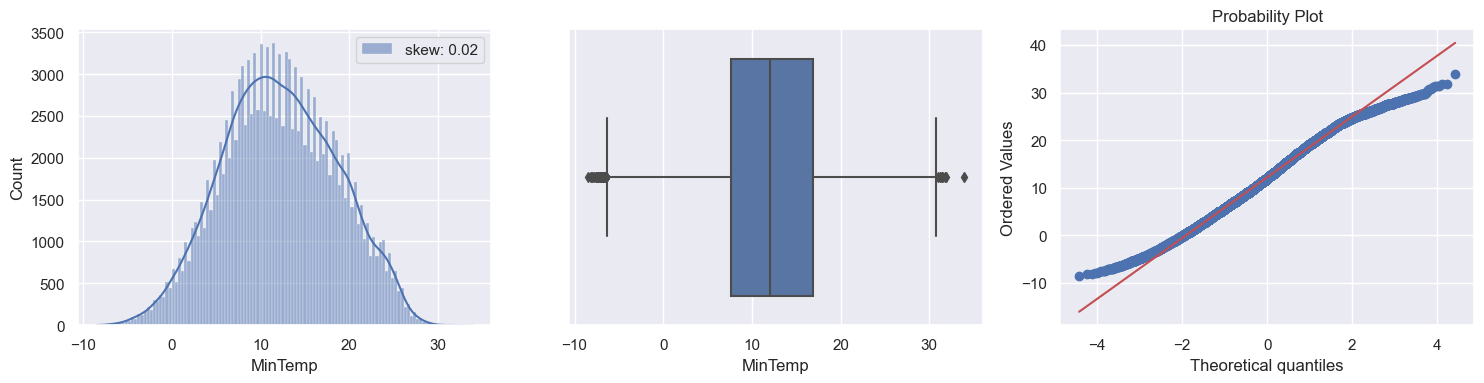

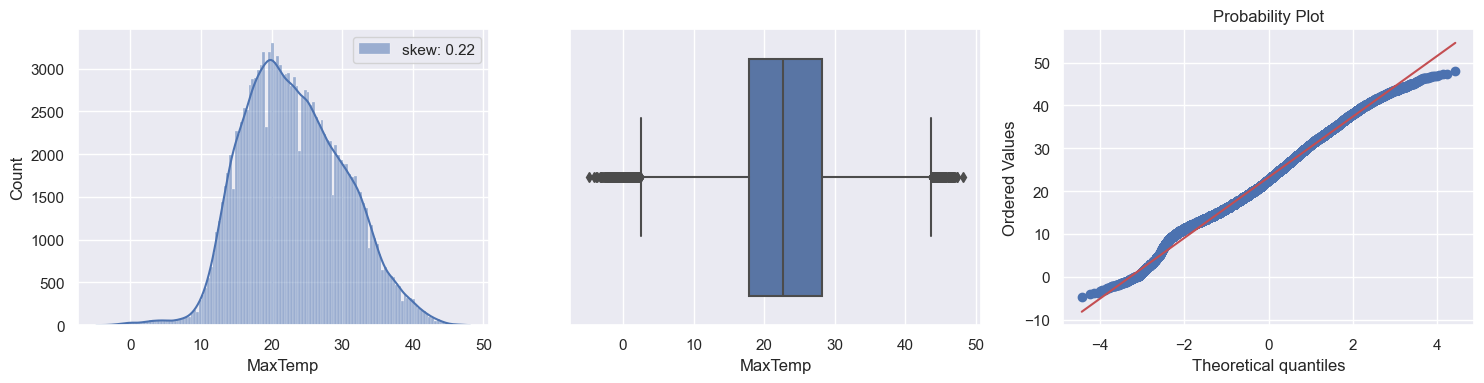

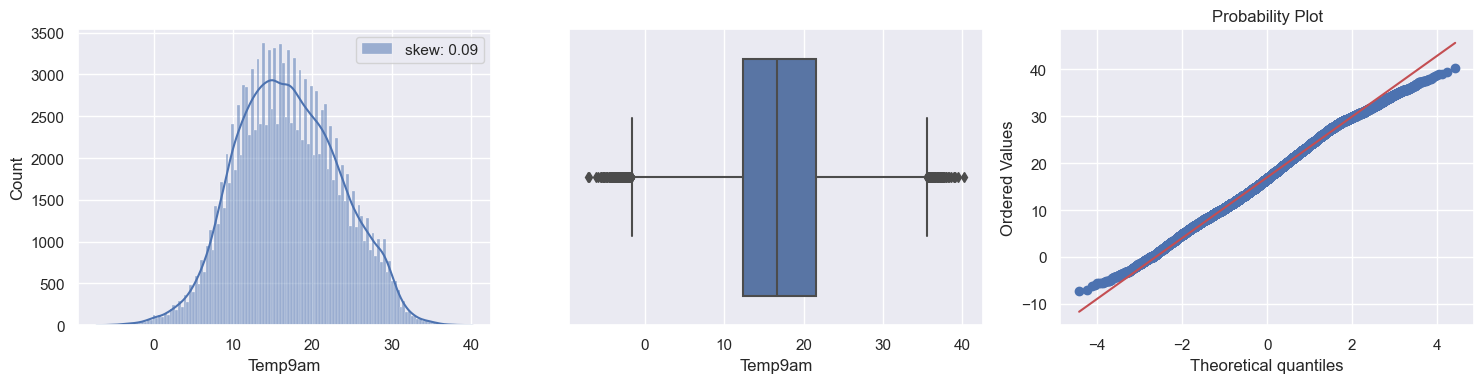

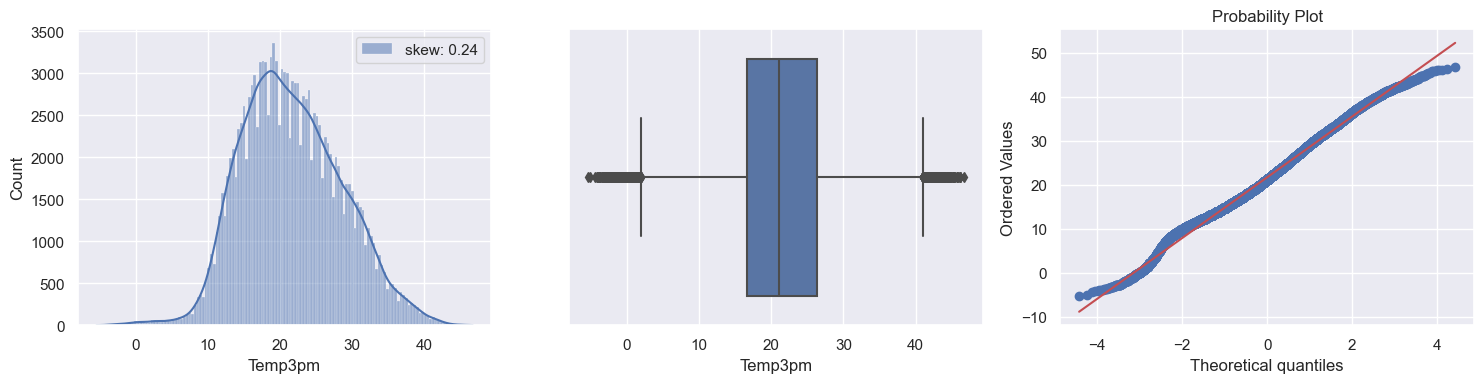

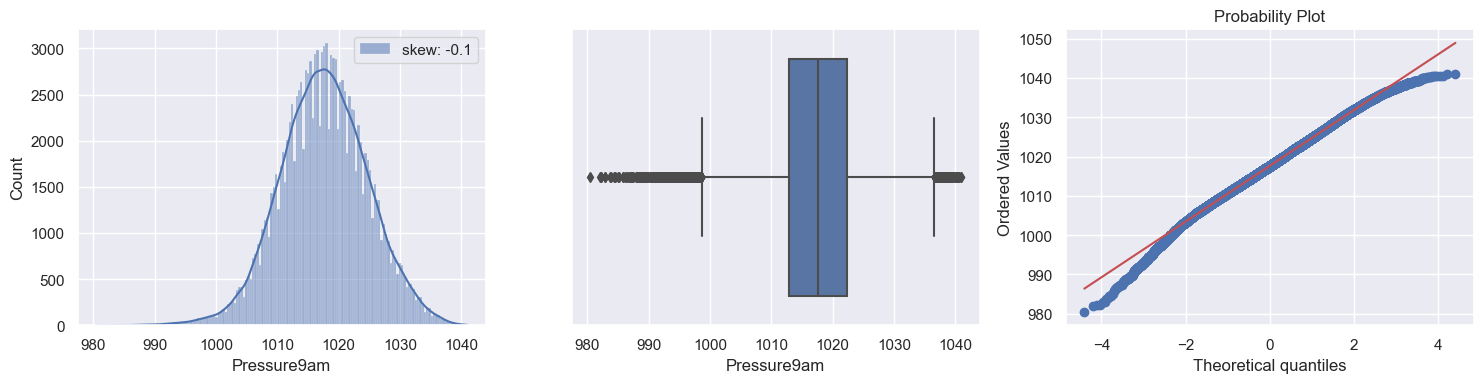

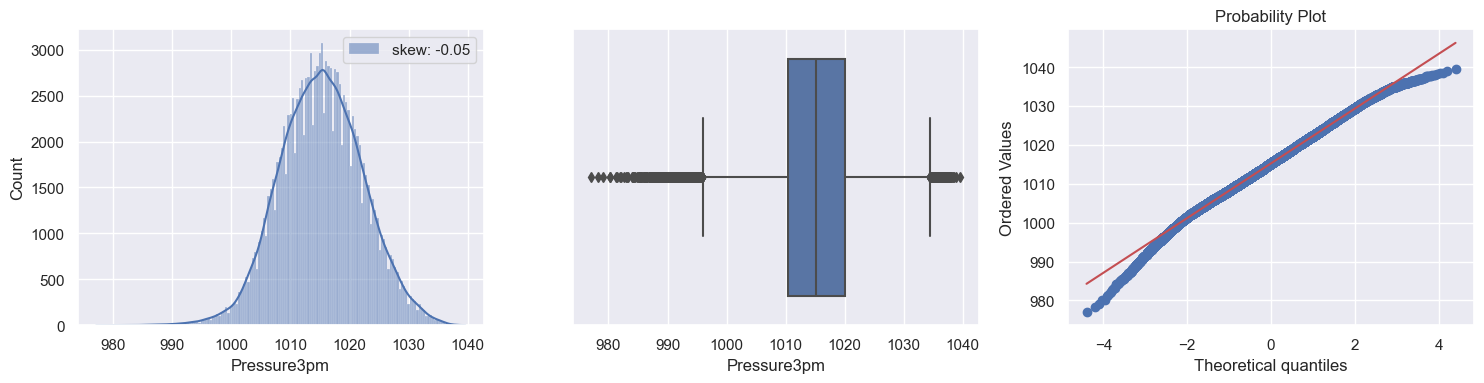

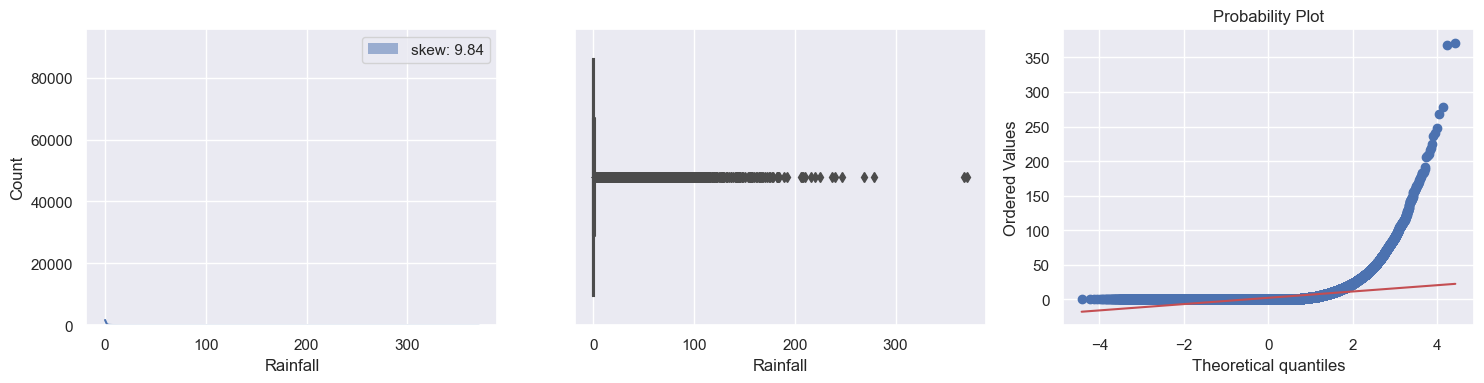

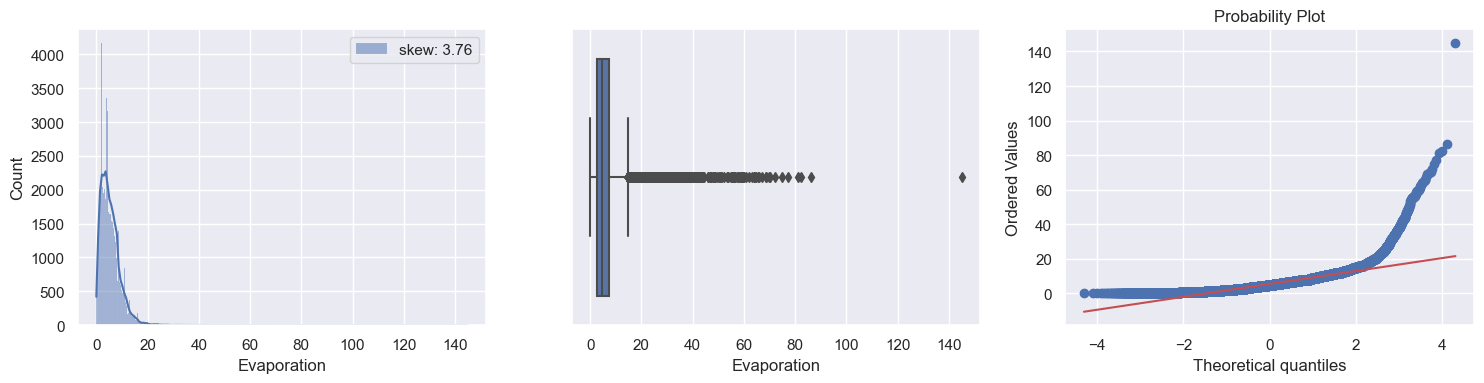

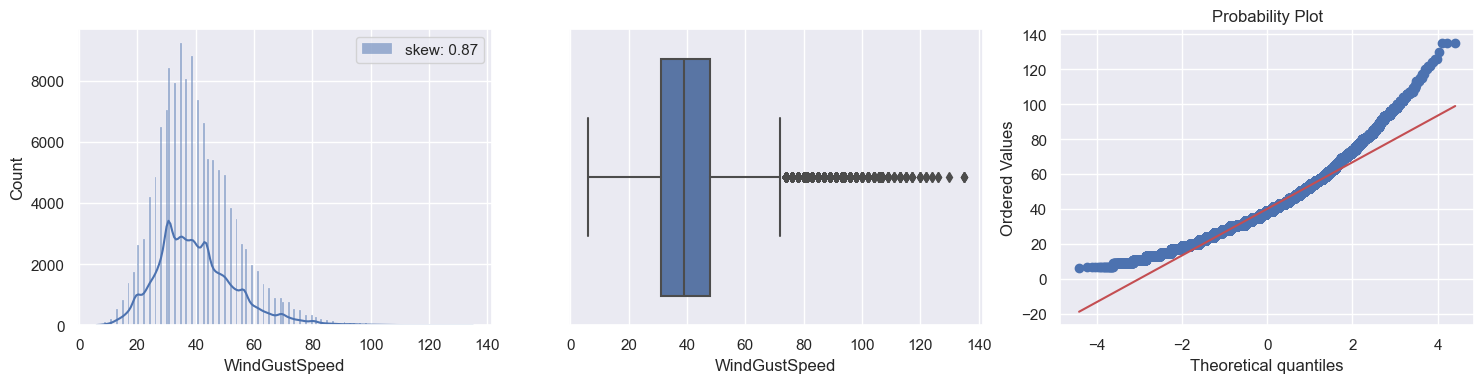

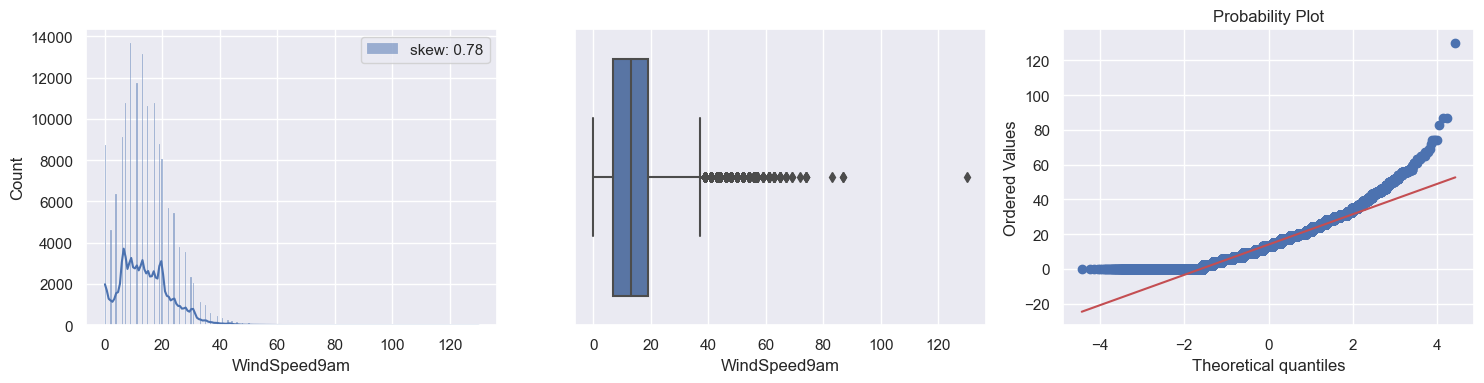

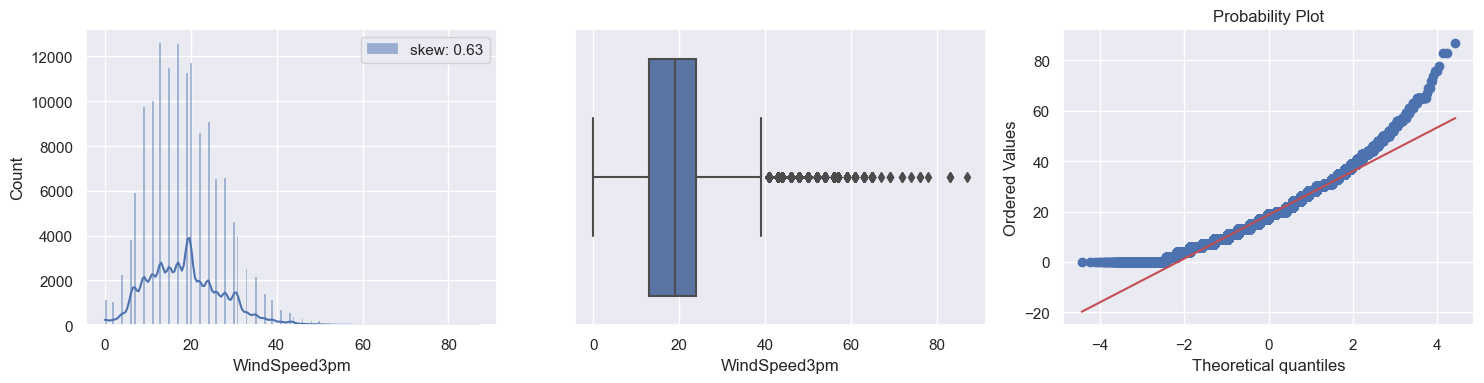

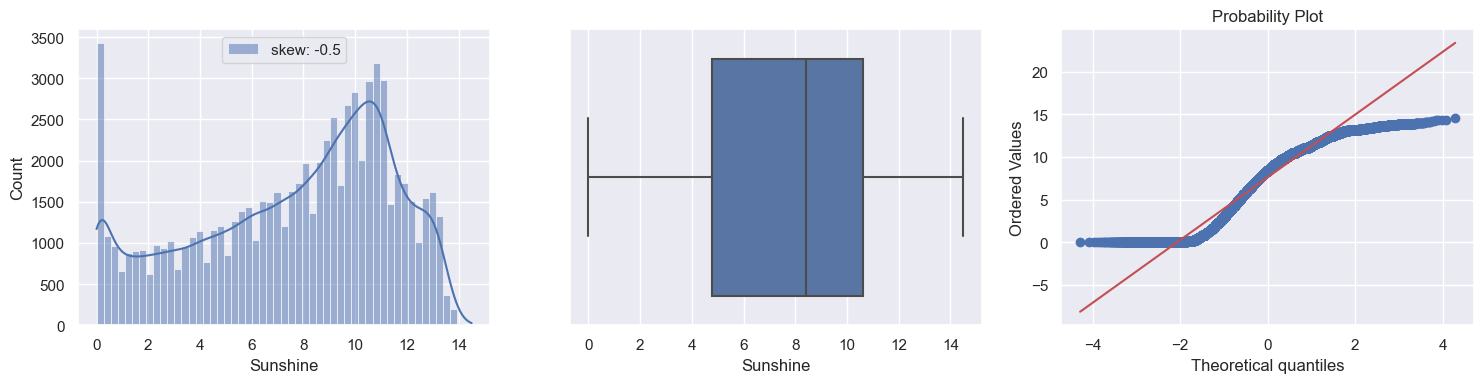

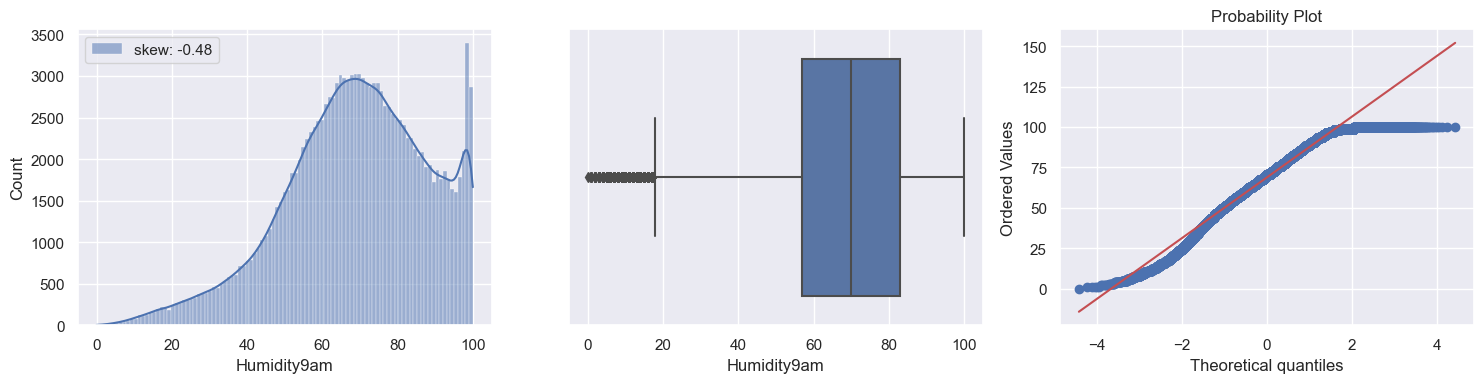

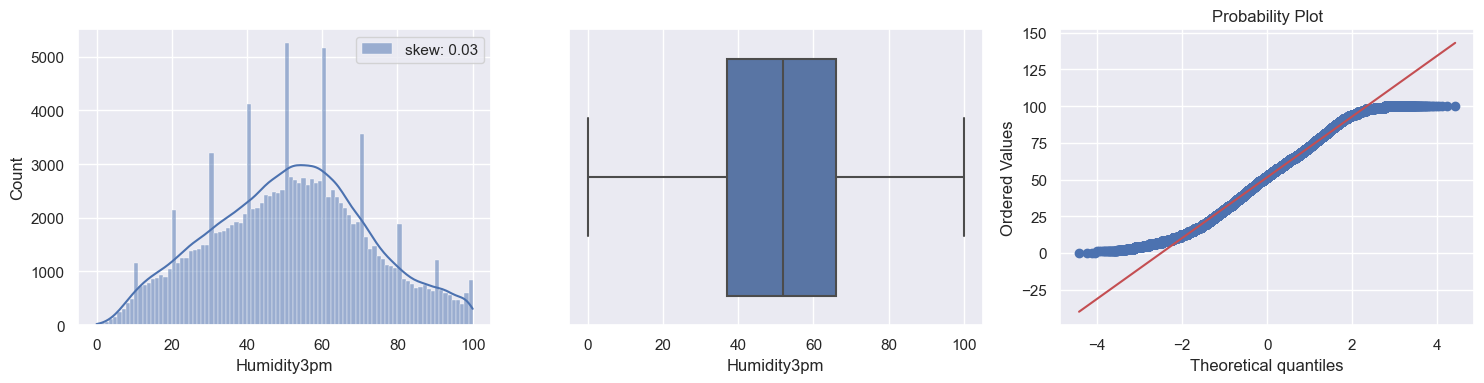

In [10]:
features = ["MinTemp","MaxTemp", "Temp9am", "Temp3pm", "Pressure9am", "Pressure3pm", "Rainfall", "Evaporation", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Sunshine", "Humidity9am", "Humidity3pm"]
display_dataset_distributions (df, features)

**Observaciones:**
* El valor de skew para las variables MinTemp, MaxTemp, Temp9am, Temp3pm, Pressure9am y Pressure3pm es bastante bajo.
* El gráfico Q-Q plot muestra que las variables, MinTemp, MaxTemp, Temp9am, Temp3pm, Pressure9am y Pressure3pm podrían asumirse con distribución normal, sin embargo se observa que las colas se separan bastante. Es probable que existan outliers en ambos lados de las colas.
* Las variable Rainfall, Evaporation, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Sunshine, Humidity9am, Humidity3pm no muestran una distribución normal.
* Se observa que la variabla Rainfall es fuertemente centrada en cero, esto se debe a que el dataset esta desbalanciado hacia días sin lluvia, RainToday="No".

In [11]:
def display_dataset_distributions_transf (df, features, qt):
    for col in features:
        df_aux = df[df[col].notnull()][col].to_numpy()
        df_aux = df_aux.reshape((len(df_aux),1))
        df_aux = qt.fit(df_aux).transform(df_aux)
        df_aux.reshape((1,-1))[0]

        fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(15, 4))
        sns.histplot(data=df_aux,kde=True, ax=axs[0])

        axs[0].set_ylabel('Count')
        fig.suptitle(col, fontsize=12)

        sns.boxplot(x=df_aux, ax=axs[1])
        stats.probplot(df_aux.reshape((1,-1))[0], plot=axs[2])

        plt.show()

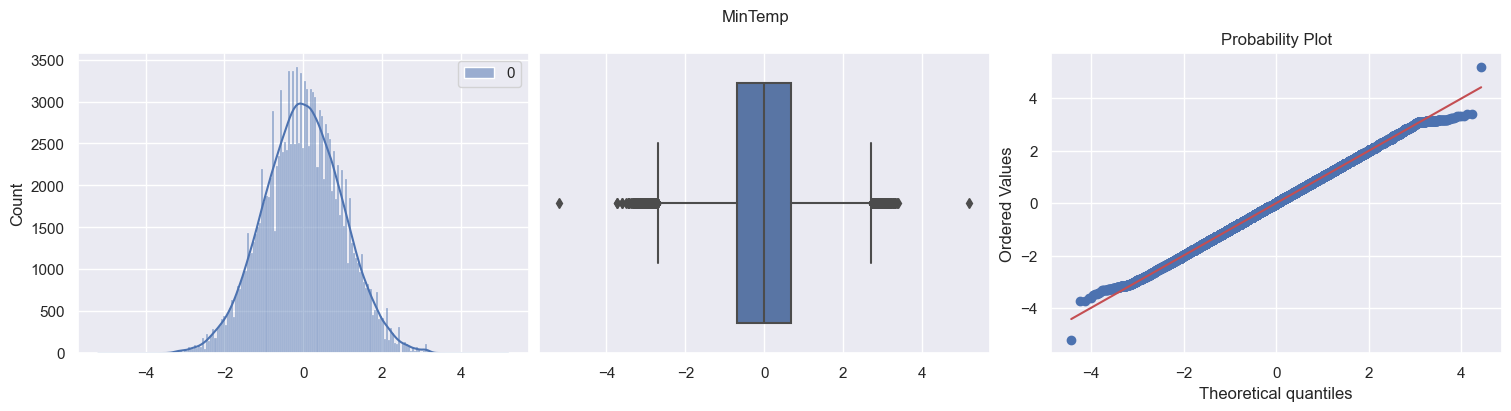

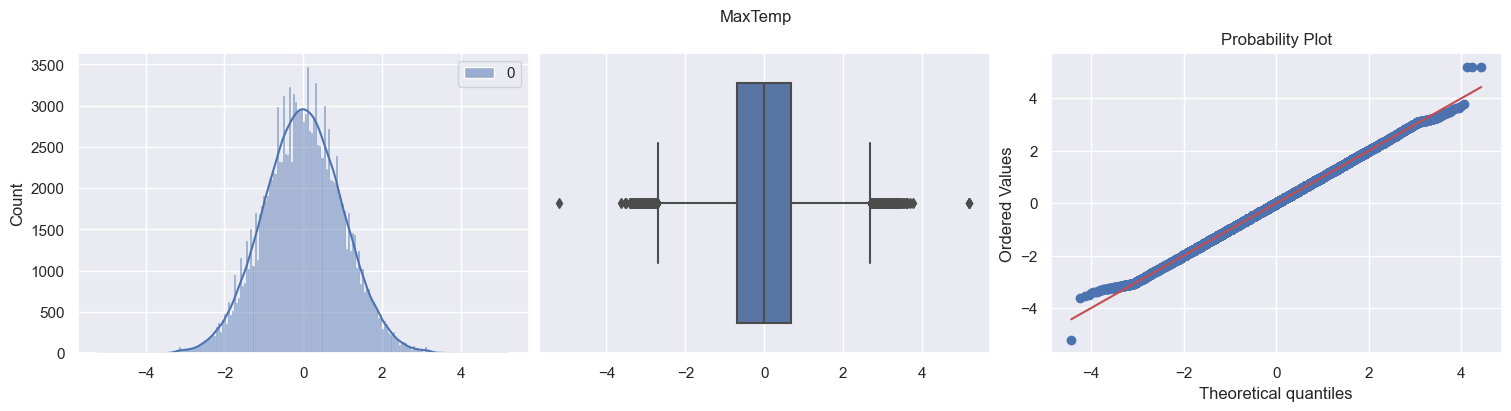

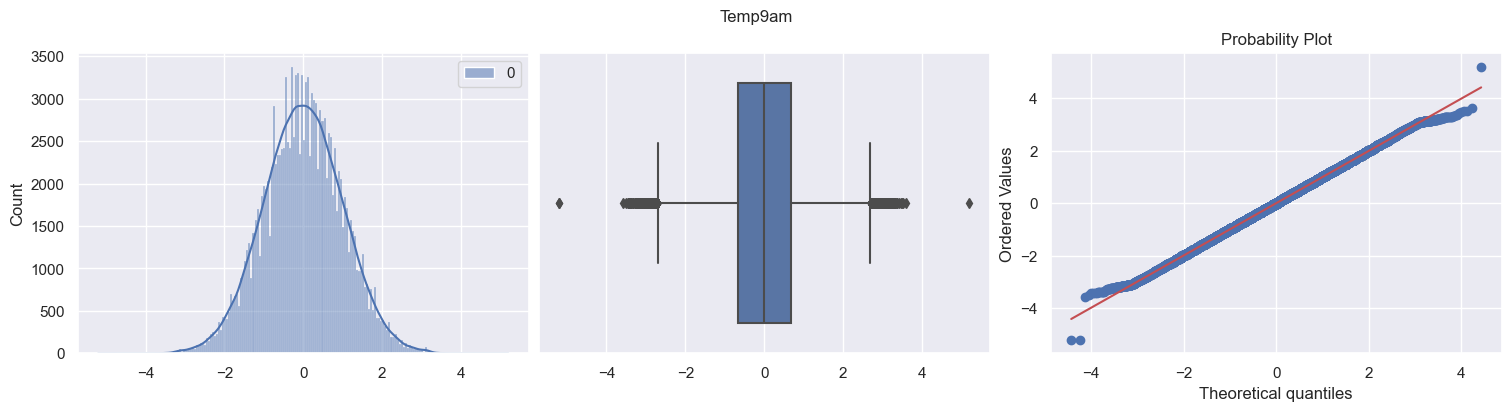

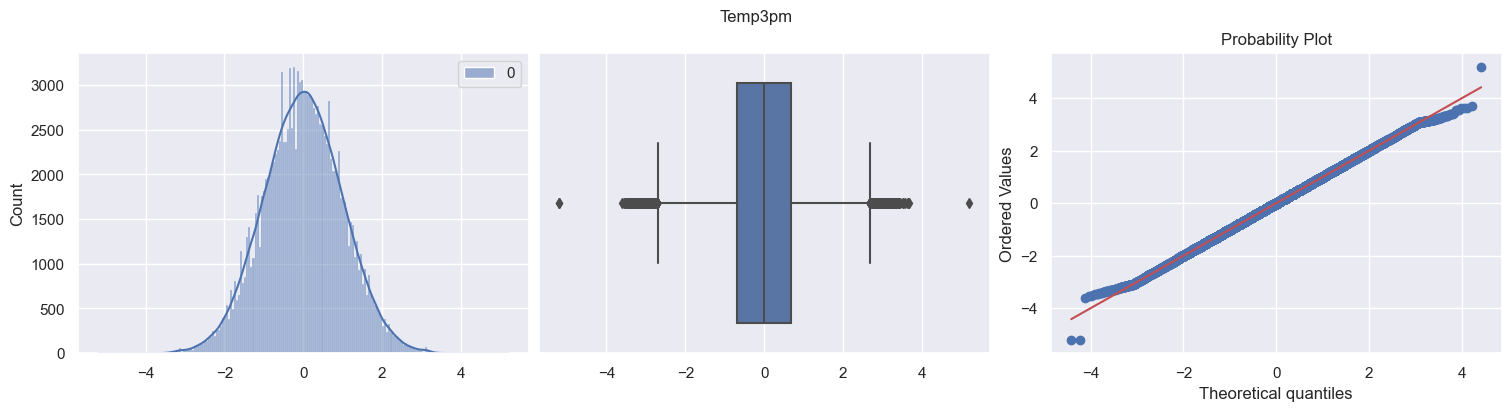

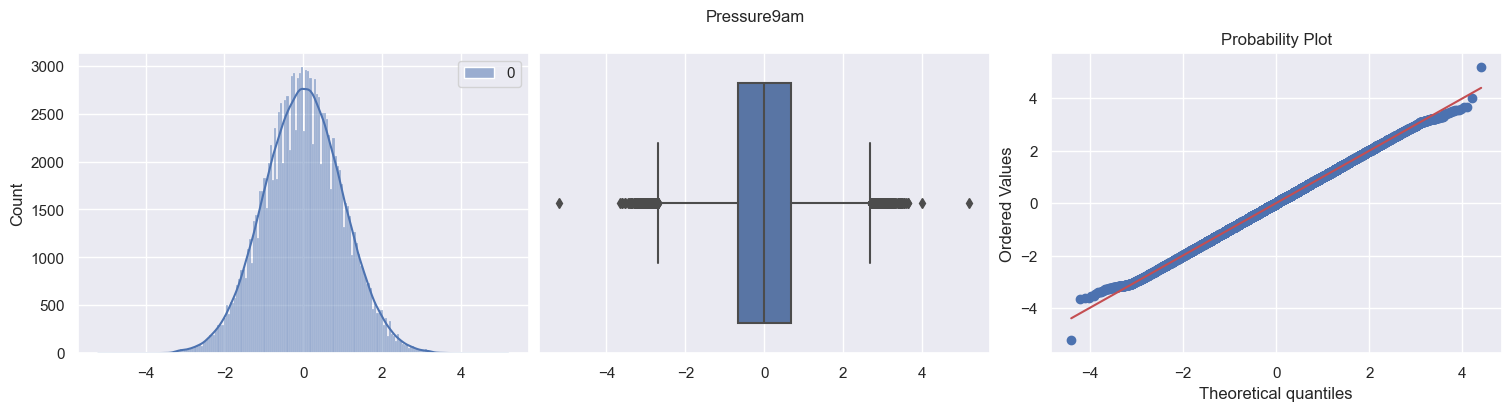

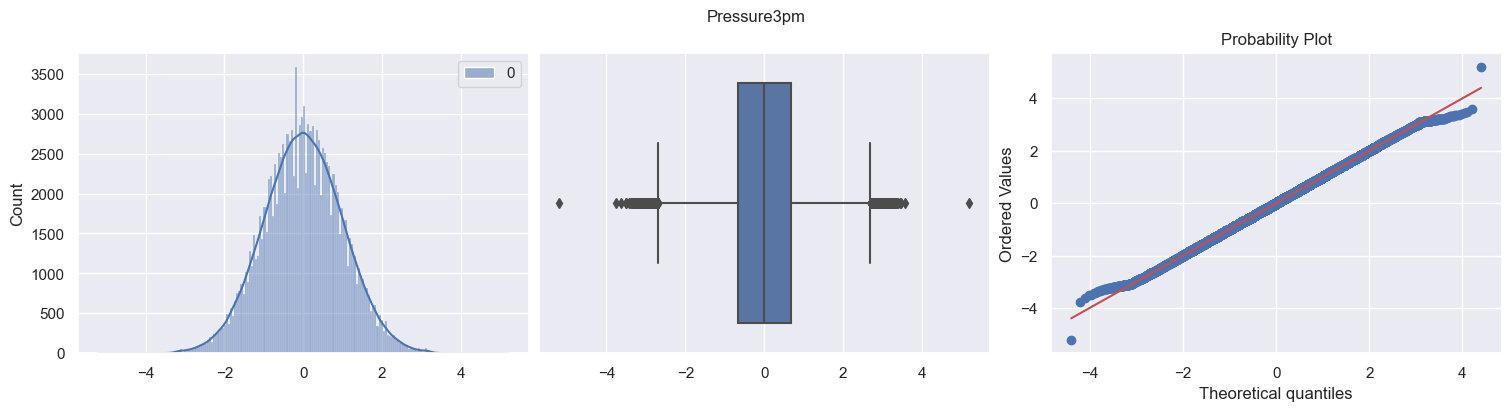

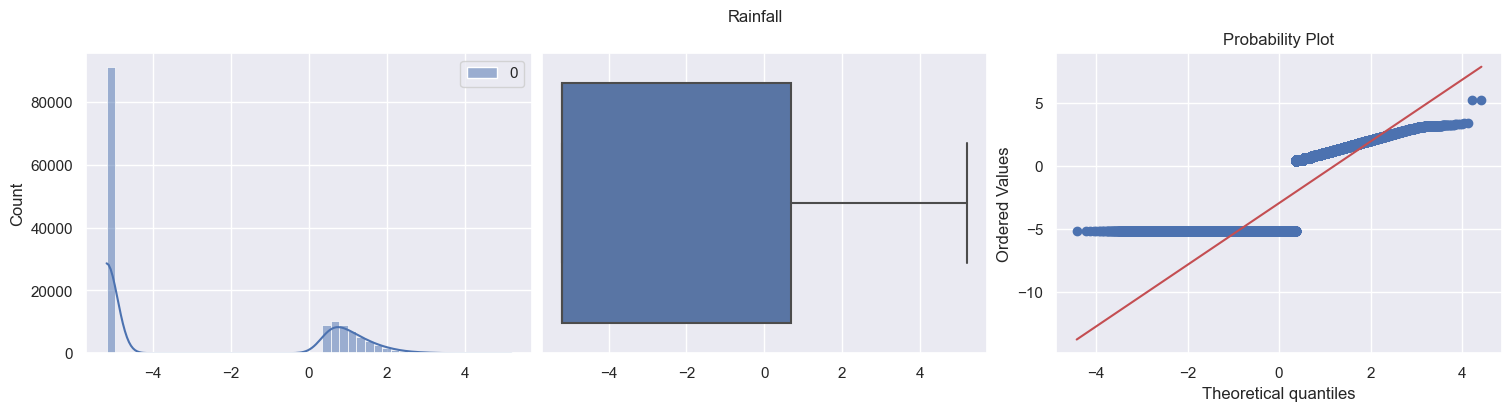

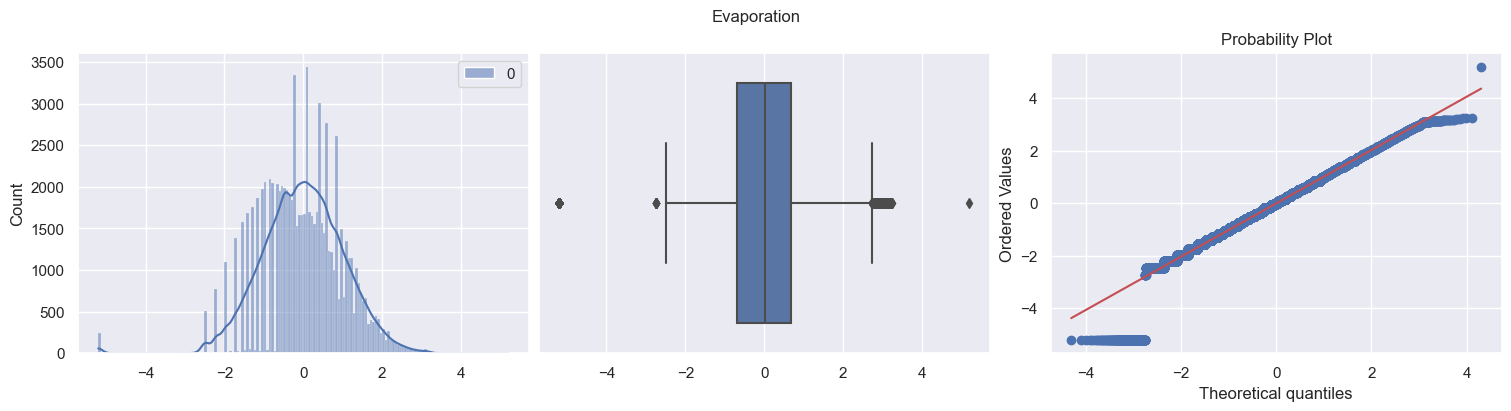

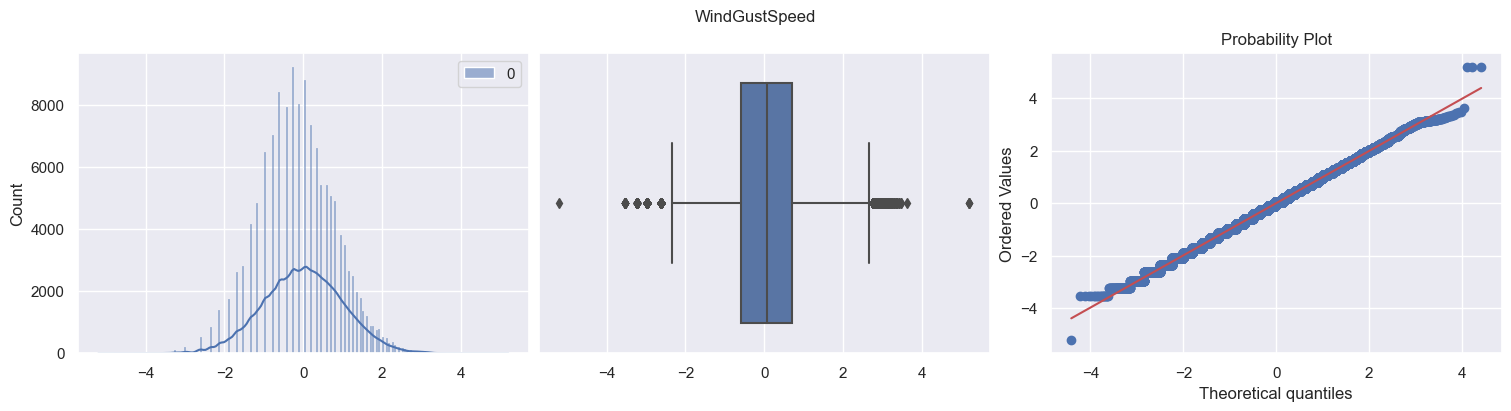

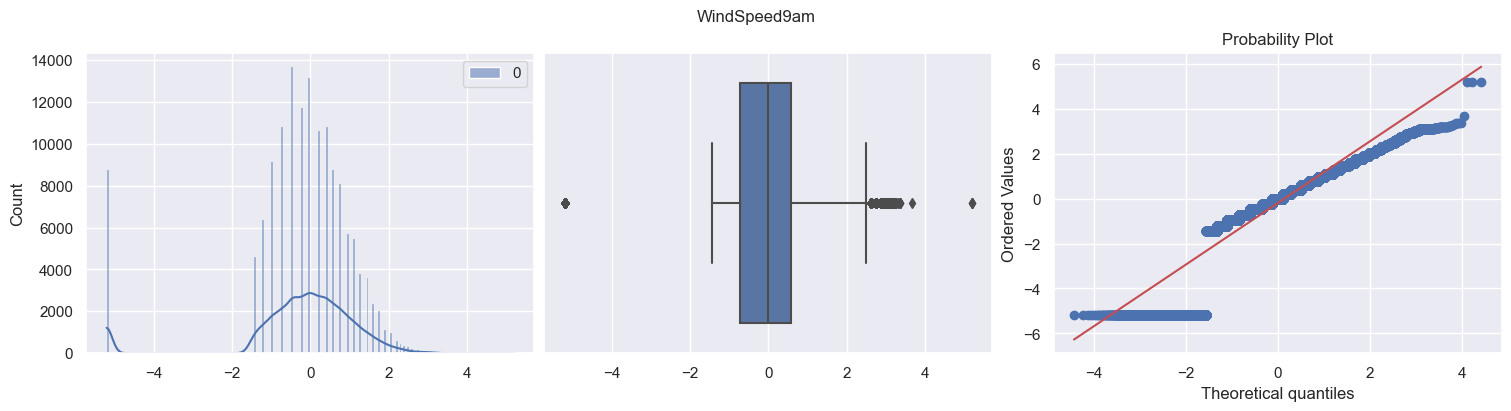

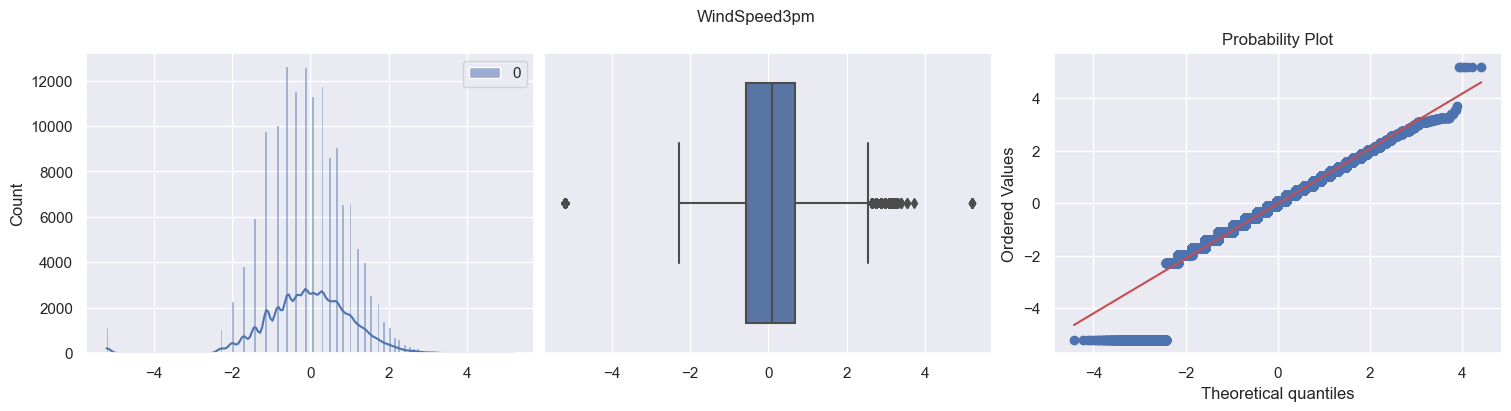

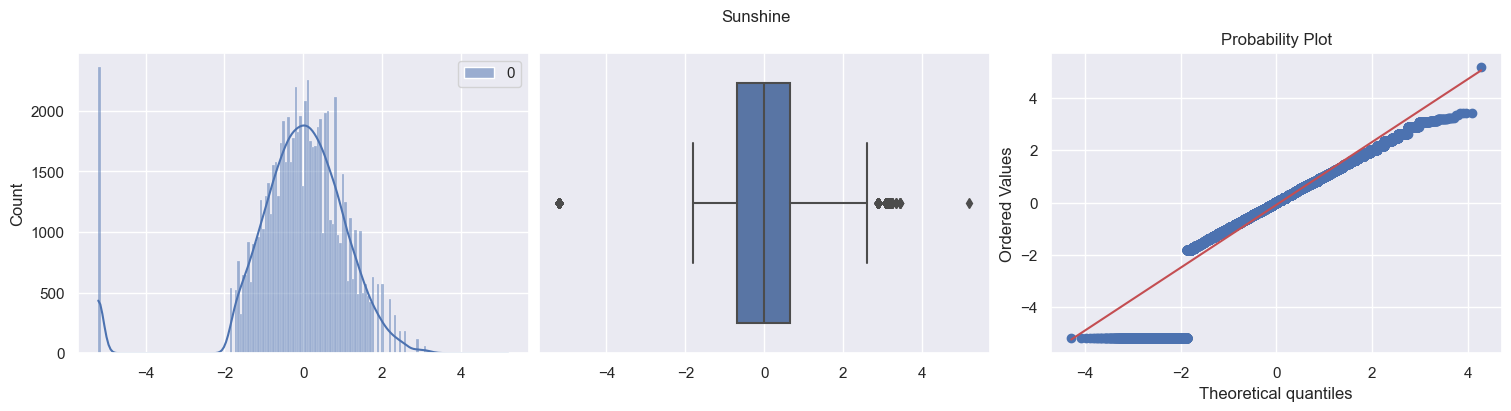

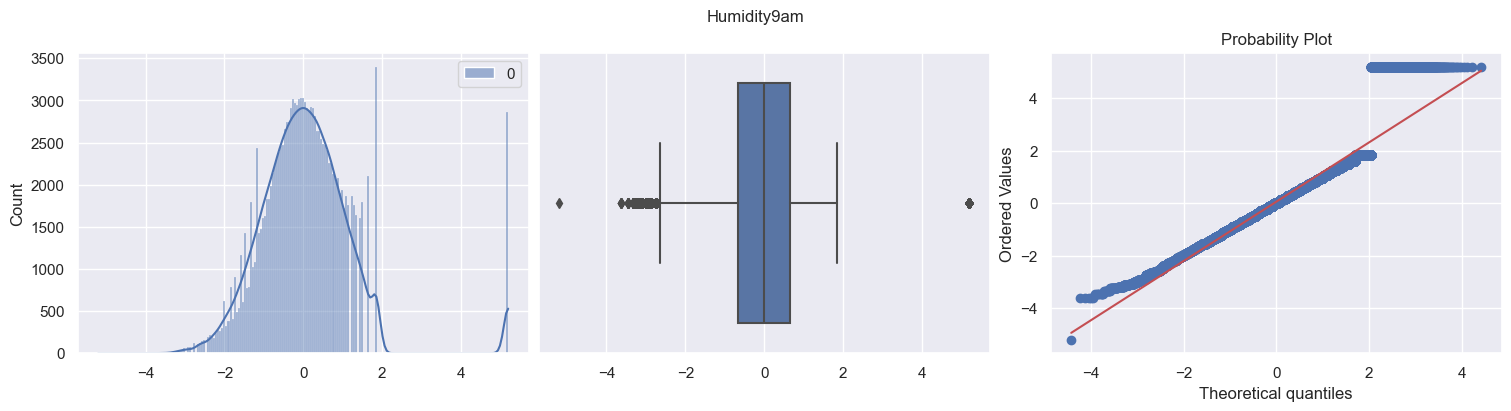

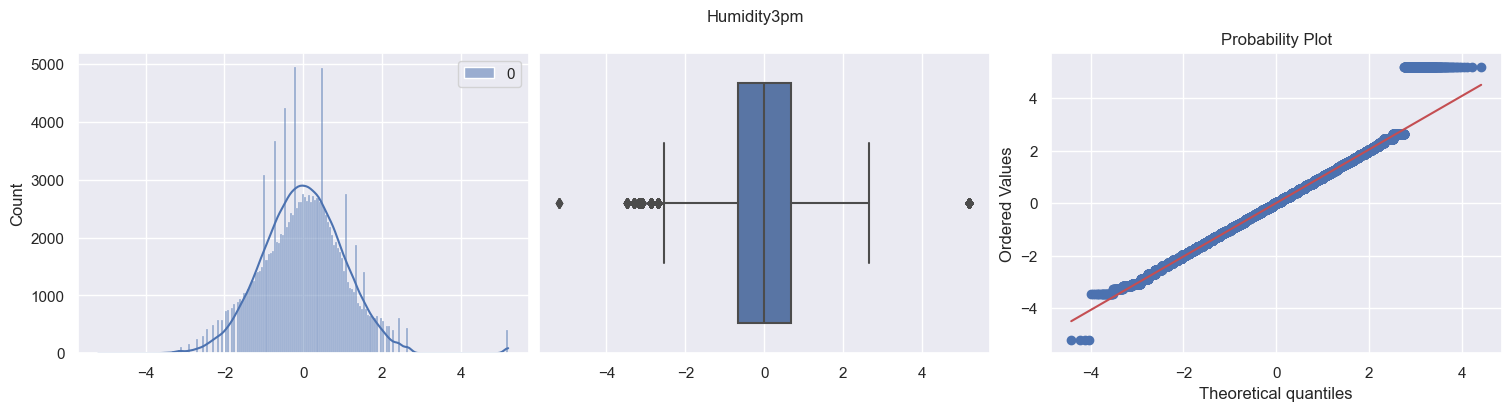

In [12]:
features = ["MinTemp","MaxTemp", "Temp9am", "Temp3pm", "Pressure9am", "Pressure3pm", "Rainfall", "Evaporation", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Sunshine", "Humidity9am", "Humidity3pm"]
qt = QuantileTransformer(n_quantiles=1000, output_distribution='normal', random_state=1)
display_dataset_distributions_transf (df, features, qt)

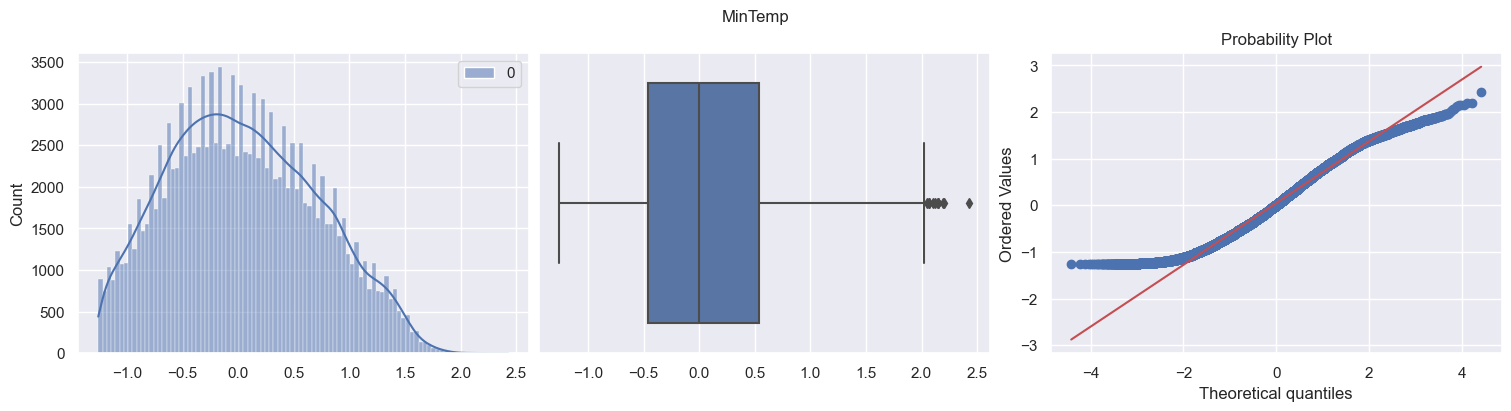

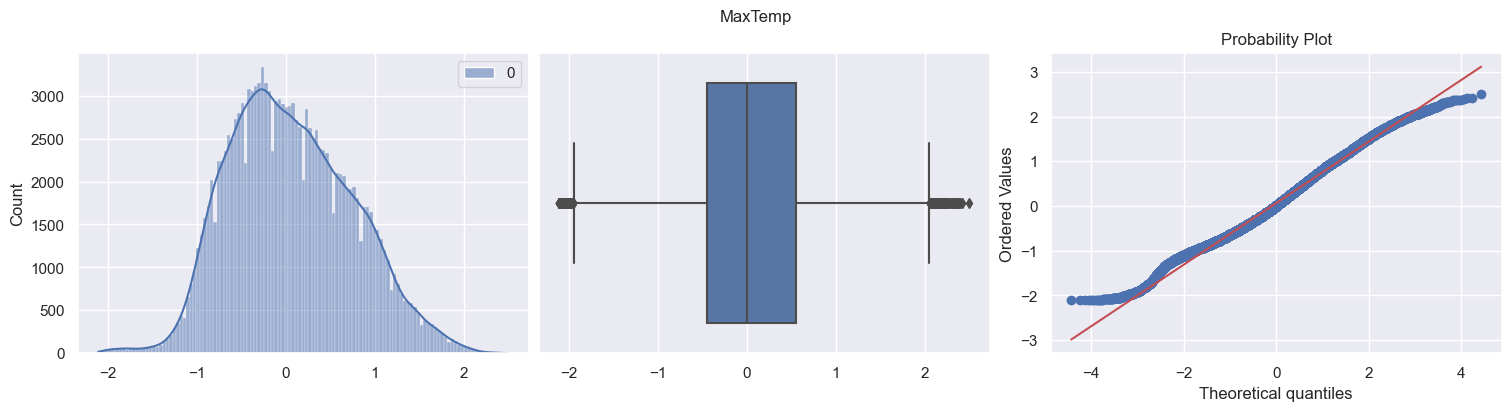

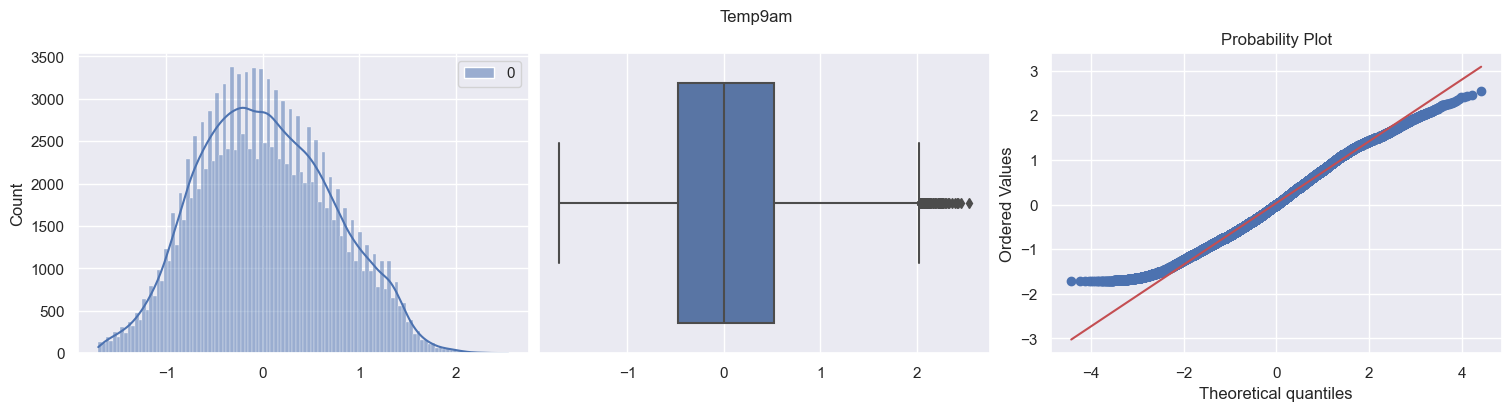

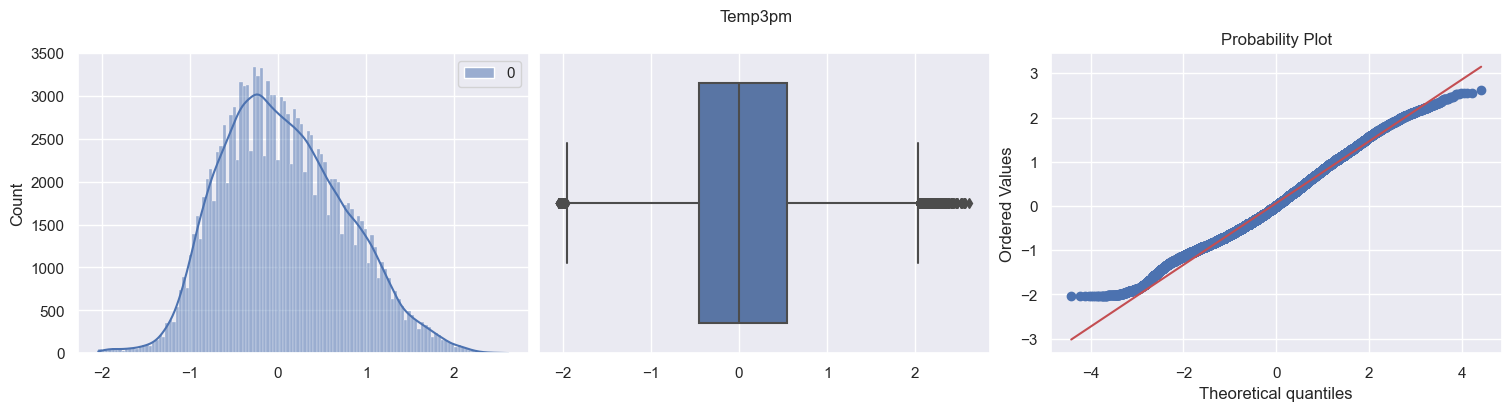

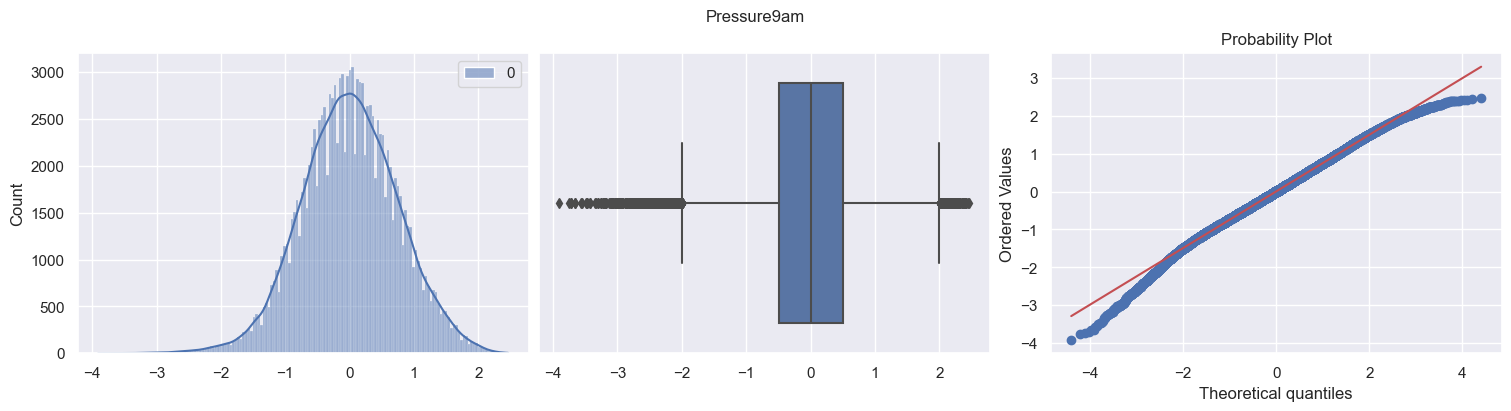

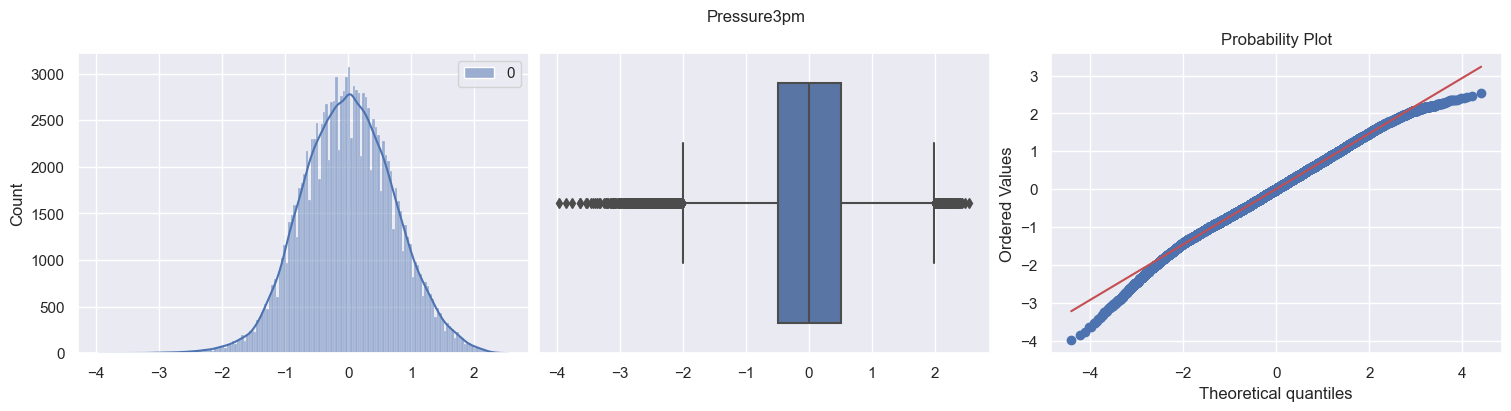

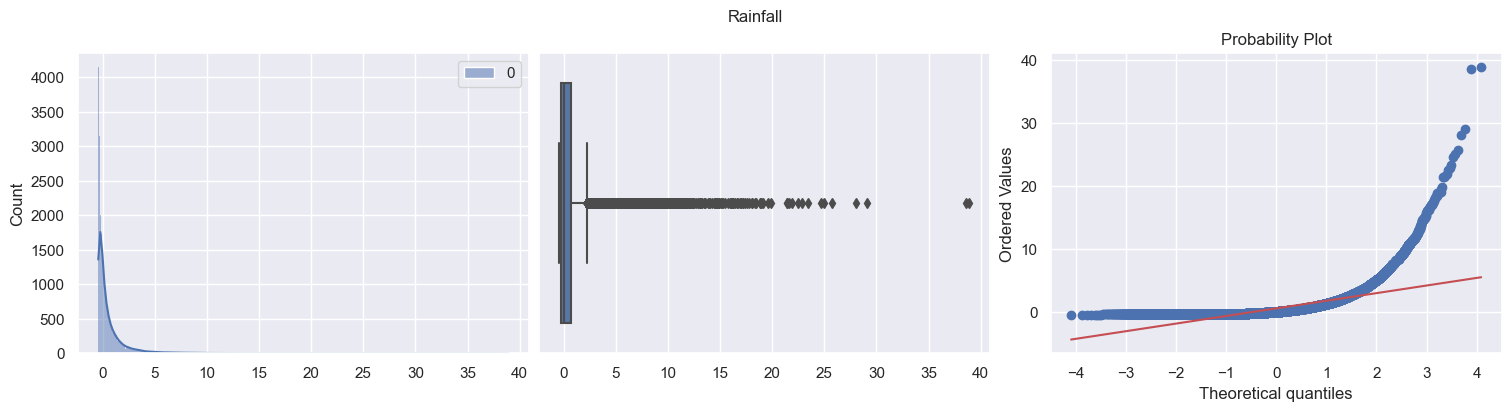

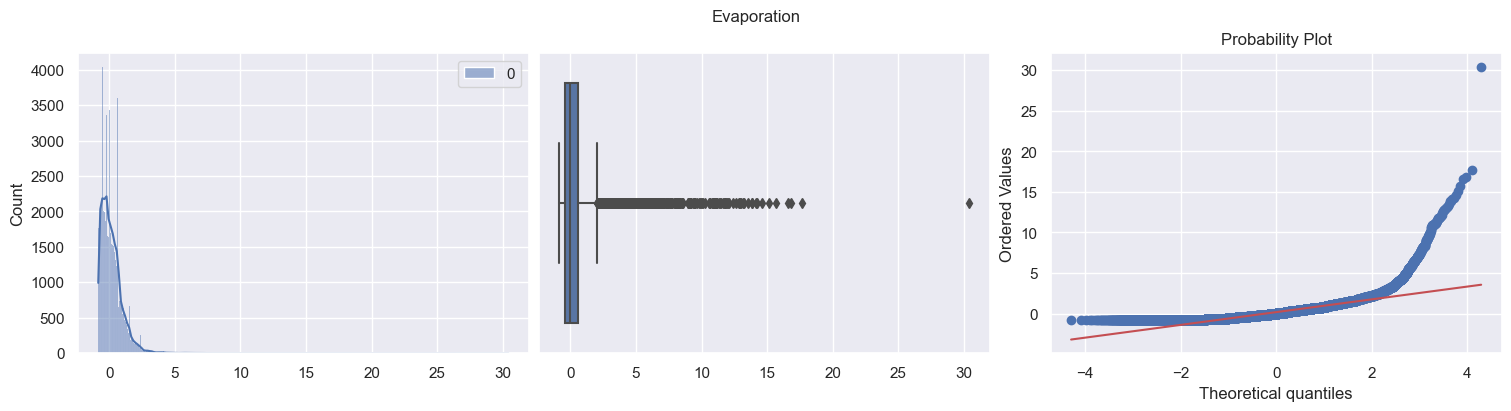

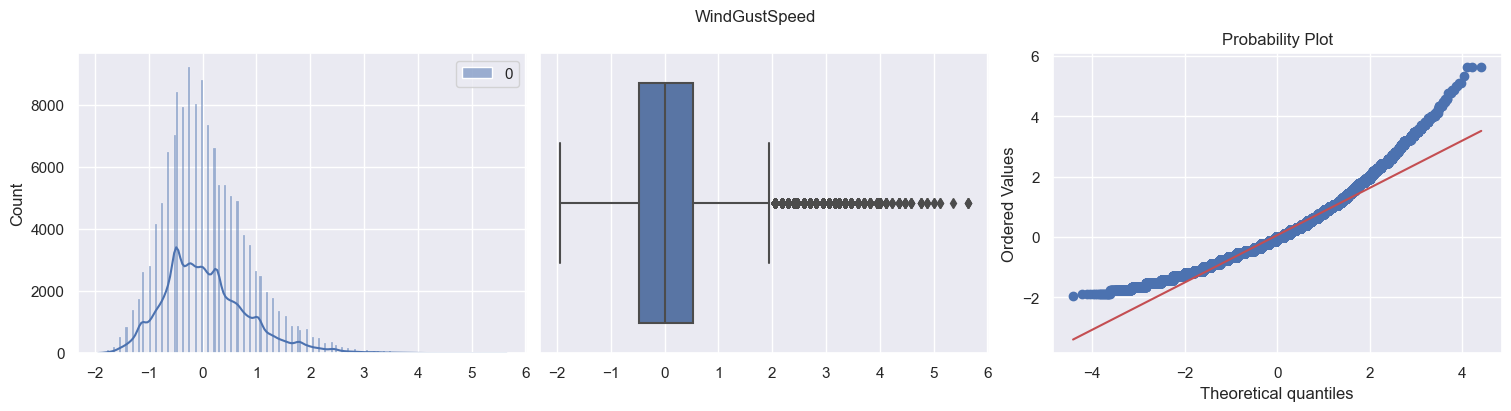

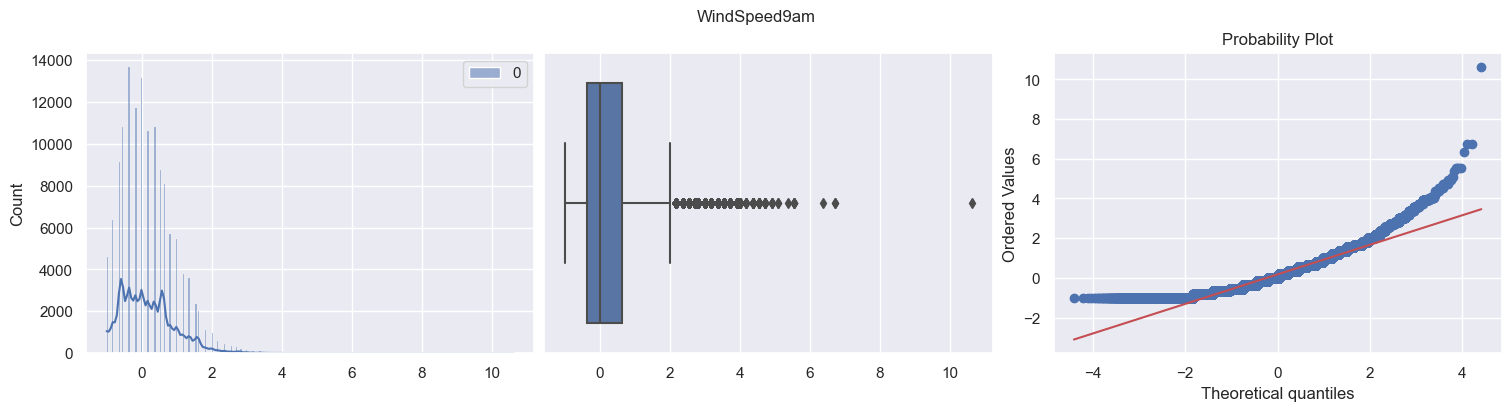

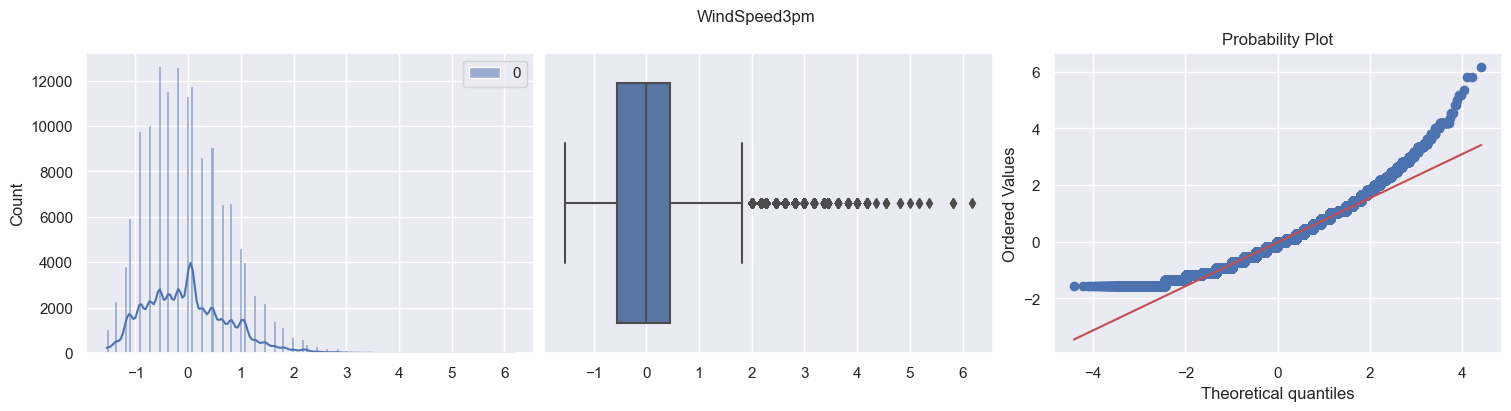

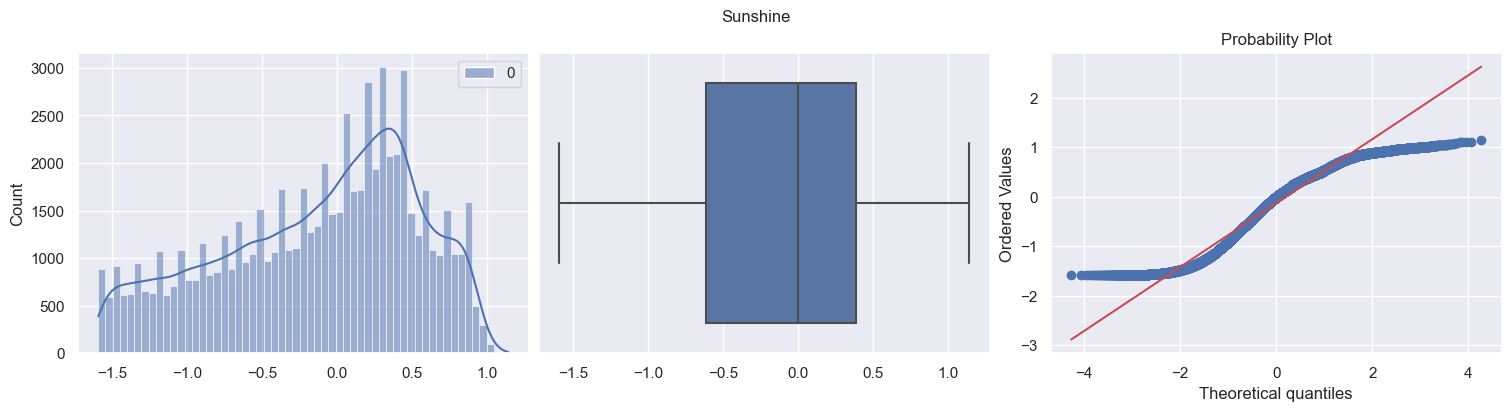

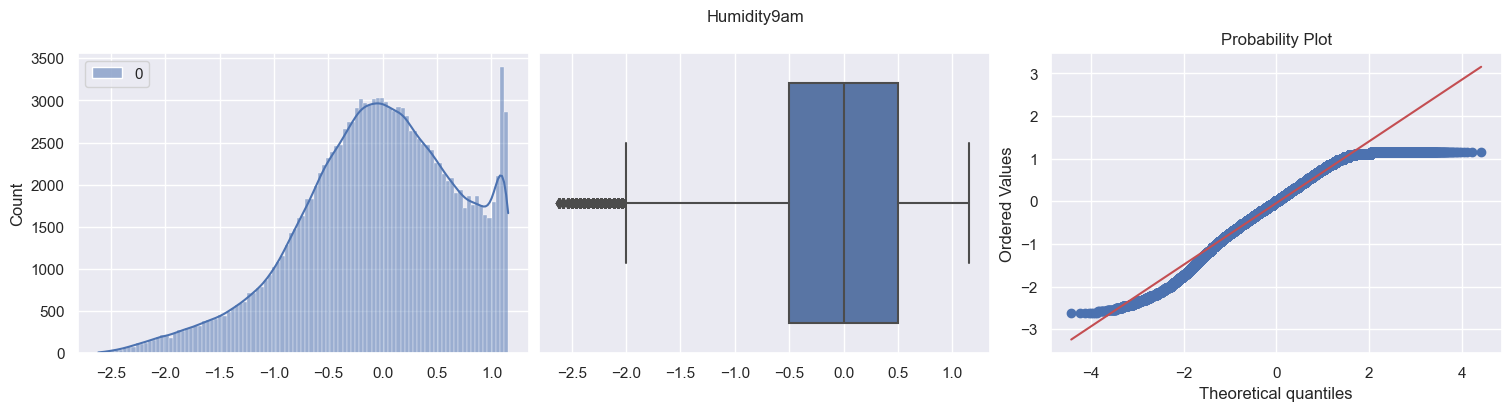

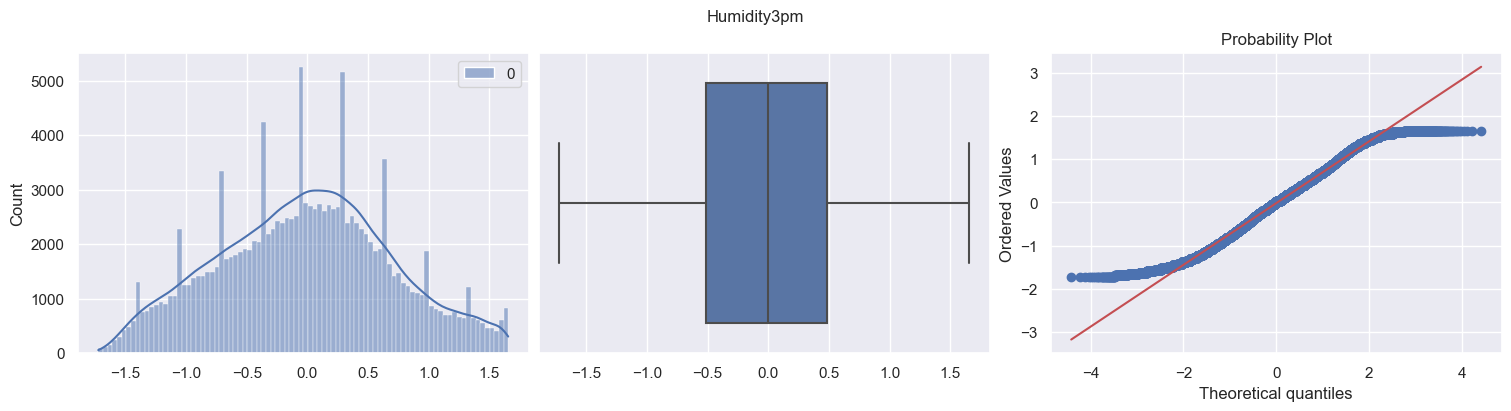

In [13]:
features =  ["MinTemp","MaxTemp", "Temp9am", "Temp3pm", "Pressure9am", "Pressure3pm", "Rainfall", "Evaporation", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Sunshine", "Humidity9am", "Humidity3pm"]
df_aux = df[df[features] >1 ]
rt = RobustScaler()
#qt = QuantileTransformer(n_quantiles=1000, output_distribution='normal', random_state=1)
display_dataset_distributions_transf (df_aux, features, rt)

## Análisis de outliers:

In [103]:
def busco_outliers (df, features):
    df_outliers = pd.DataFrame({'feature': [], 'outliers_livianos': [], 'outliers_pesados': [], 'outliers_zscore':[], 'outliers_forest':[]})
    for col in features:
        
        #outliers z-score
        data_mean, data_std = np.mean(df[col]), np.std(df[col])
        cutoff = data_std*3
        lower,upper = data_mean-cutoff, data_mean+cutoff
        outliers_zscore = sum((df[col]<lower) | (df[col]>upper))
    

        
        #outliers iqr
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        limite_inferior = df[col].quantile(0.25) - (IQR * 1.5)
        limite_superior = df[col].quantile(0.75) + (IQR * 1.5)

        outliers_ligeros = sum((df[col] > limite_superior) | (df[col] < limite_inferior))
        limite_inferior = df[col].quantile(0.25) - (IQR * 3)
        limite_superior = df[col].quantile(0.75) + (IQR * 3)
        outliers_pesados = sum((df[col] > limite_superior) | (df[col] < limite_inferior))
    

    
        #outliers forest:
        clf = IsolationForest(n_estimators=10, warm_start=True)
        lof = LocalOutlierFactor()
        yhat = lof.fit_predict(df[~df[col].isnull()][col].to_numpy().reshape(-1,1)) 
        outliers_forest =  np.sum((yhat == -1))
    
        df_outliers = df_outliers.append({'feature': col, 'outliers_livianos': outliers_ligeros, 
                                          'outliers_pesados': outliers_pesados,
                                         'outliers_zscore': outliers_zscore,
                                          'outliers_forest':outliers_forest
                                         }, ignore_index=True)

    return df_outliers, df
  

In [33]:
features = ["MinTemp","MaxTemp", "Temp9am", "Temp3pm", "Pressure9am", "Pressure3pm", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm"]
outliers, df = busco_outliers(df, features)
outliers

feature  outliers_livianos  outliers_pesados  outliers_zscore  \
0         MinTemp               54.0               0.0             19.0   
1         MaxTemp              489.0               0.0            331.0   
2         Temp9am              262.0               0.0            149.0   
3         Temp3pm              764.0               0.0            397.0   
4     Pressure9am             1191.0               8.0            503.0   
5     Pressure3pm              919.0               7.0            426.0   
6        Rainfall            25578.0           20762.0           2456.0   
7     Evaporation             1995.0             481.0            870.0   
8        Sunshine                0.0               0.0              0.0   
9   WindGustSpeed             3092.0             153.0           1368.0   
10   WindSpeed9am             1817.0             114.0           1362.0   
11   WindSpeed3pm             2523.0              82.0            958.0   
12    Humidity9am             1425.0               0.0            472.0   
13    Humidity3pm                0.0               0.0              0.0   

    outliers_forest  
0              41.0  
1             130.0  
2             101.0  
3              94.0  
4              94.0  
5             180.0  
6             329.0  
7             500.0  
8              22.0  
9              34.0  
10             16.0  
11             32.0  
12              1.0  
13              4.0

**Observaciones:**
* En general el analisis realizo por IQR tiende a penalizar más a los outliers.
* El análisis realizado utilizando la regla Z score penaliza mucha las variables que no poseen distribuciones parecidas a la normal (Railfall, Evaporation, WindGustSpeed,WindSpeed9am, WindSpeed3pm, Humidity9am).

## Análisis de correlación entre variables de entrada:

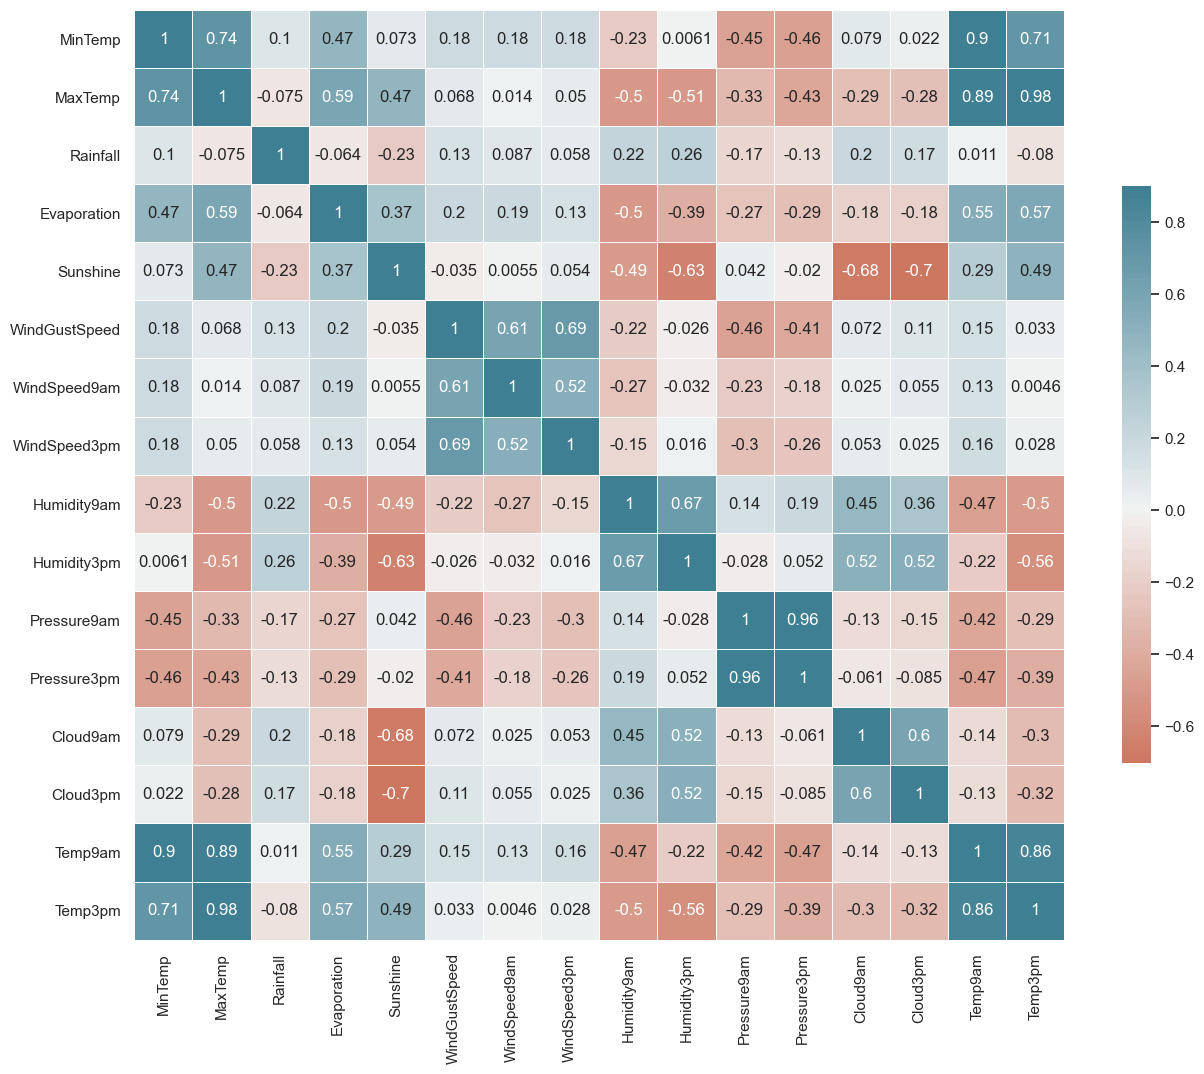

In [19]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap=sns.diverging_palette(20, 220, n=200), vmax=.9, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.show()

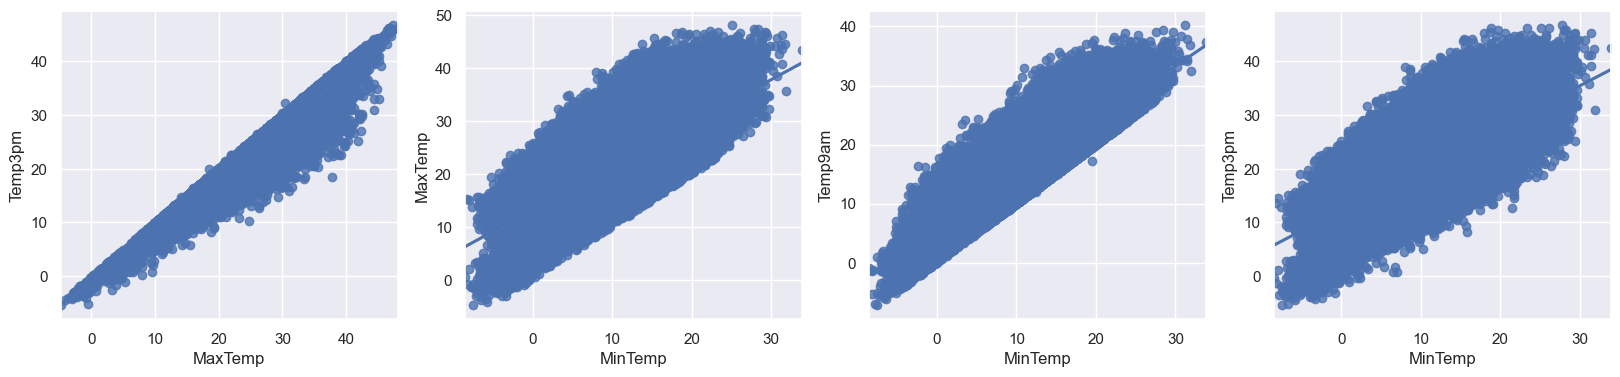

In [35]:
fig,axes = plt.subplots(1,4,figsize=(20,4))
sns.regplot(x="MaxTemp", y="Temp3pm", data=df, order=1,ax=axes[0])
sns.regplot(x="MinTemp", y="MaxTemp", data=df, order=1,ax=axes[1])
sns.regplot(x="MinTemp", y="Temp9am", data=df, order=1,ax=axes[2])
sns.regplot(x="MinTemp", y="Temp3pm", data=df, order=1,ax=axes[3])
plt.show()

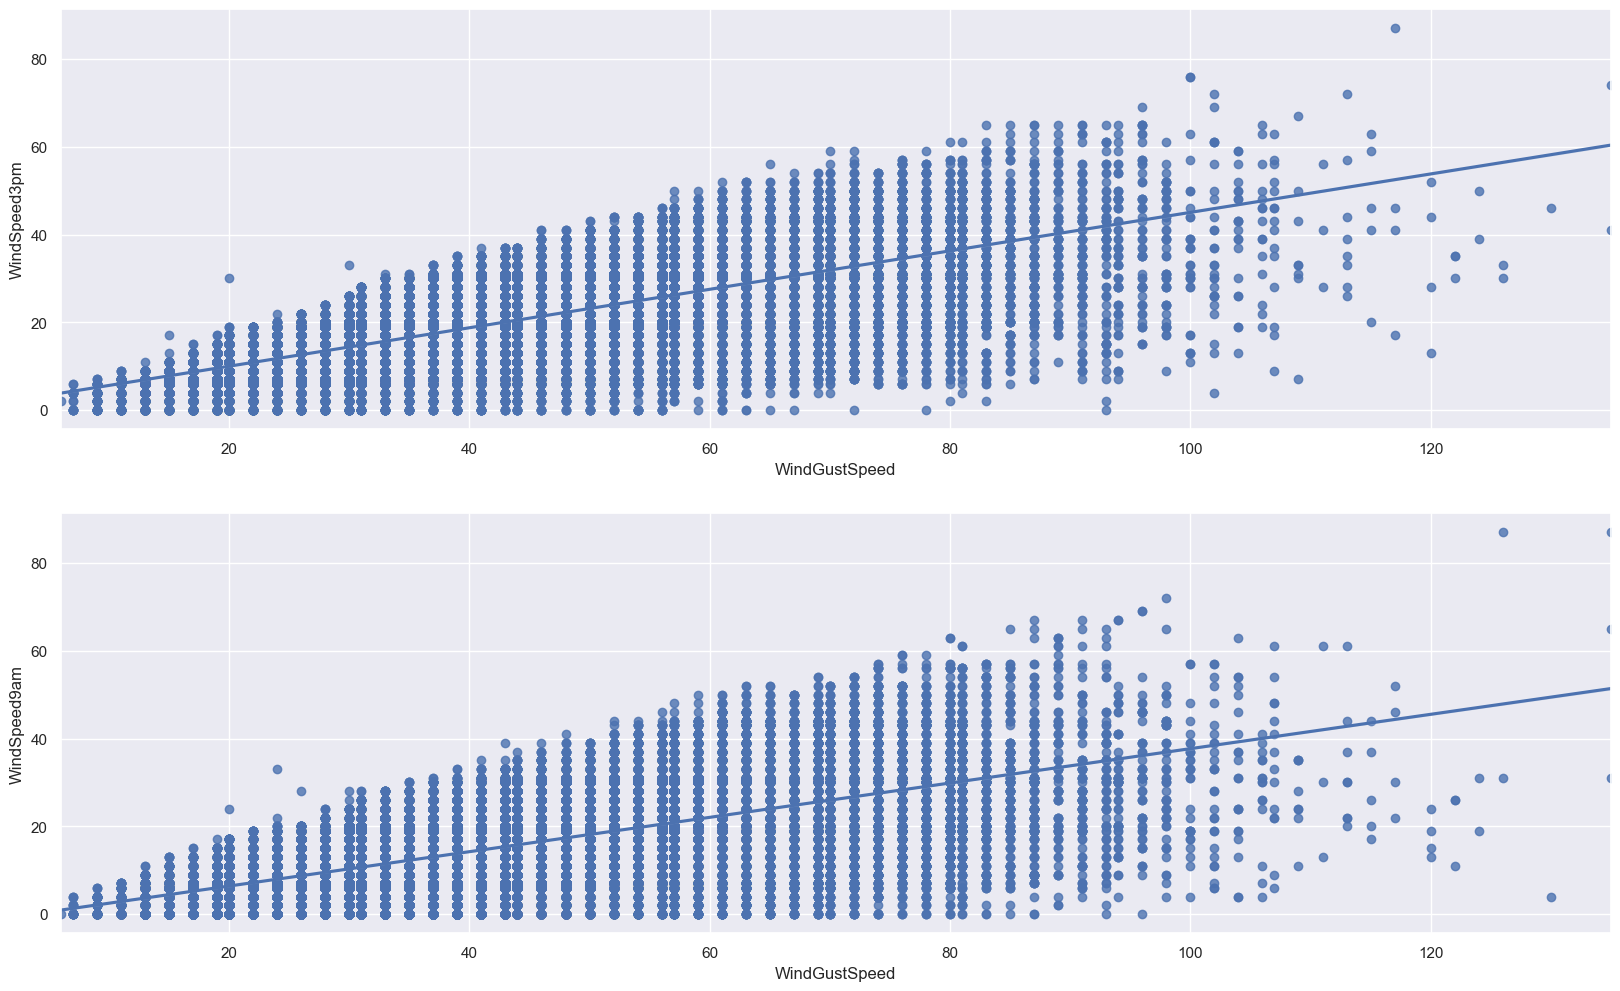

In [36]:
fig,axes = plt.subplots(2,1,figsize=(20,12))
sns.regplot(x="WindGustSpeed", y="WindSpeed3pm", data=df, order=1,ax=axes[0])
sns.regplot(x="WindGustSpeed", y="WindSpeed9am", data=df, order=1,ax=axes[1])
plt.show()

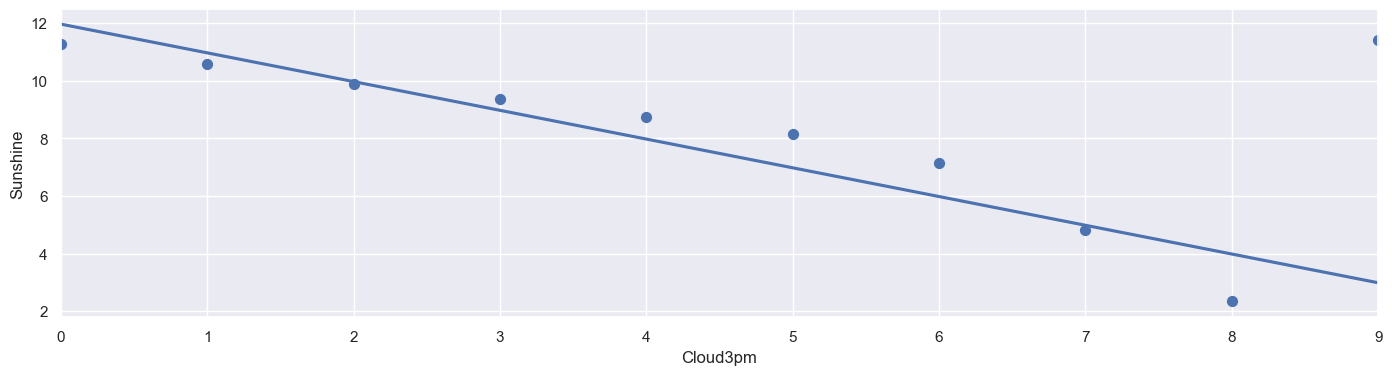

In [37]:
fig,axes = plt.subplots(figsize=(17,4))
sns.regplot(y="Sunshine", x="Cloud3pm", data=df, order=1,ax=axes, x_estimator=np.mean)
plt.show()

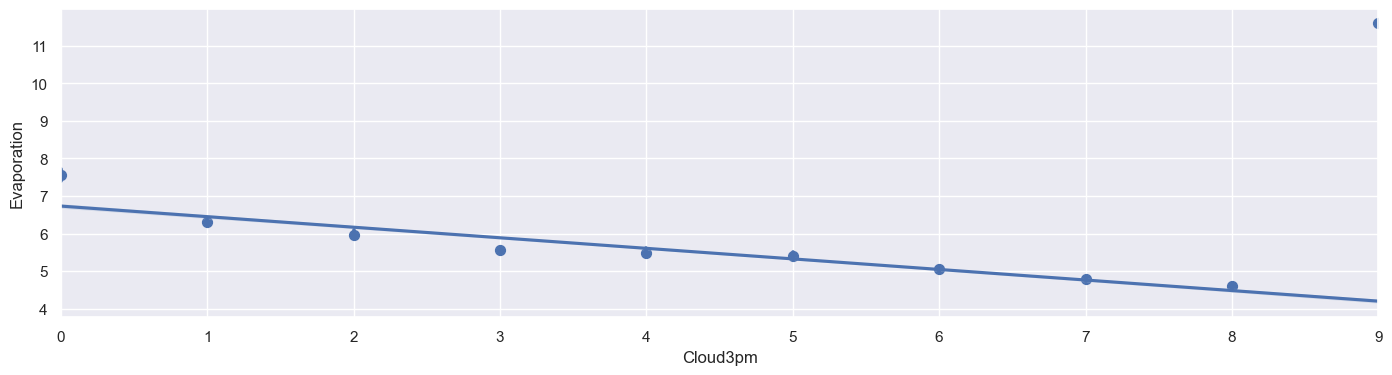

In [38]:
fig,axes = plt.subplots(figsize=(17,4))
sns.regplot(y="Evaporation", x="Cloud3pm", data=df, order=1,ax=axes, x_estimator=np.mean)
plt.show()

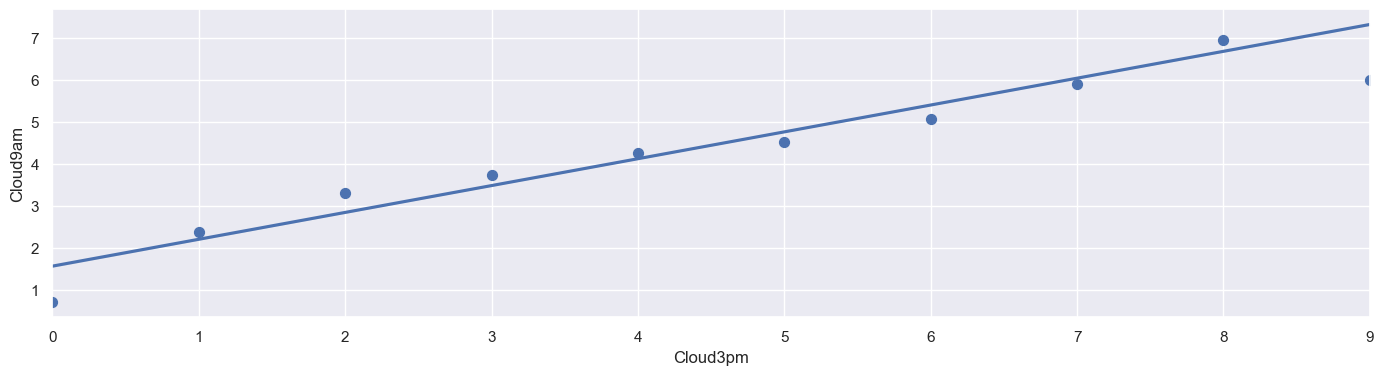

In [56]:
fig,axes = plt.subplots(figsize=(17,4))
sns.regplot(y="Cloud9am", x="Cloud3pm", data=df, order=1,ax=axes, x_estimator=np.mean)
plt.show()

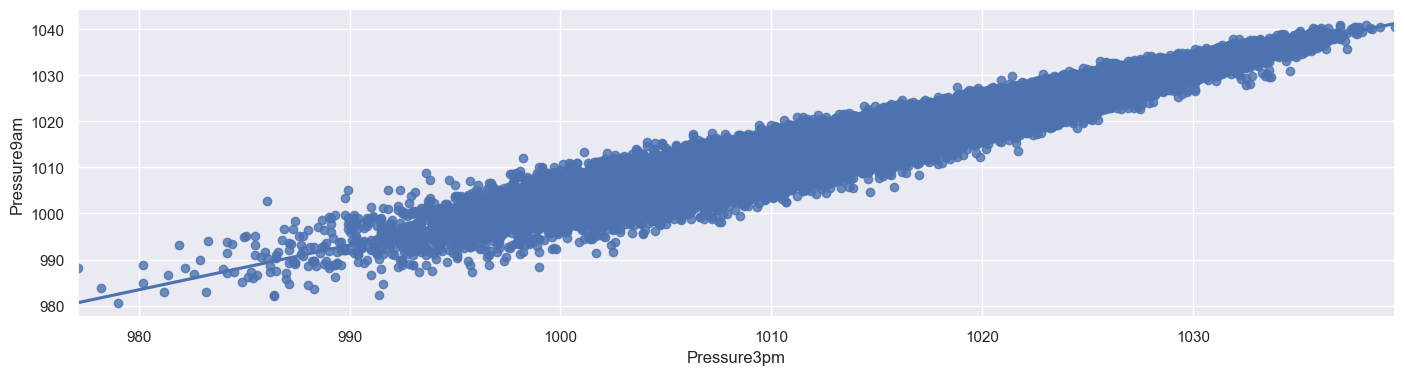

In [55]:
fig,axes = plt.subplots(figsize=(17,4))
sns.regplot(y="Pressure9am", x="Pressure3pm", data=df, order=1,ax=axes)
plt.show()

In [72]:
df.groupby(df["RainTomorrow"]).mean()

MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
RainTomorrow                                                          
No            11.897675  23.836247  1.270290     5.734807  8.546358   
Yes           13.186890  21.119100  6.142104     4.527779  4.471761   

              WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
RainTomorrow                                                           
No                38.288391     13.567314     18.222804    66.217573   
Yes               45.946764     15.508577     20.078509    77.983314   

              Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
RainTomorrow                                                              
No              46.510625  1018.595599  1016.113587  3.932282  3.921896   
Yes             68.800019  1014.400000  1012.300820  6.099990  6.360065   

                Temp9am    Temp3pm  
RainTomorrow                        
No            17.077001  22.402905  
Yes           16.676598  19.197113

**Observaciones:**
* Existe una fuerte correlación entre las variables MinTemp, MaxTemp, Temp9am, Temp3pm.
* Existe una fuerte correlación entre las variables WindGustSpeed, WindSpeed3pm y WindSpeed9am.
* Exiset una fuerte correlación entre las variables Sunshine y las variables Humidity3pm y Humidity9am.
* Exiset una fuerte correlación entre las variables Sunshine y las variables Cloud9am y Cloud3pm.
* Exiset una fuerte correlación entre las variables Cloud9am y Cloud3pm.
* Existe una fuerta correlación entre las variables Pressure9am y Pressure3pm.

## Análisis de variables categóricas de entrada:
* Date           
* Location       
* WindGustDir
* WindDir9am 
* WindDir3pm    
* Cloud9am    
* Cloud3pm
* RainToday  
* RainTomorrow

In [39]:
# Analizamos las variables categoricas:
df.describe(include='object')

Location WindGustDir WindDir9am WindDir3pm RainToday RainTomorrow
count     145460      135134     134894     141232    142199       142193
unique        49          16         16         16         2            2
top     Canberra           W          N         SE        No           No
freq        3436        9915      11758      10838    110319       110316

In [40]:
print(df.Location.unique())
print("Cardinalidad: ", len(df.Location.unique()))

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
Cardinalidad:  49


In [41]:
print(df.WindGustDir.unique())
print("Cardinalidad: ", len(df.WindGustDir.unique()))

['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
Cardinalidad:  17


In [42]:
print(df.WindDir9am.unique())
print("Cardinalidad: ", len(df.WindDir9am.unique()))

['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
Cardinalidad:  17


In [43]:
print(df.WindDir3pm.unique())
print("Cardinalidad: ", len(df.WindDir3pm.unique()))

['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
Cardinalidad:  17


In [44]:
print(df.Cloud9am.unique())
print("Cardinalidad: ", len(df.Cloud9am.unique()))

[ 8. nan  7.  1.  0.  5.  4.  2.  6.  3.  9.]
Cardinalidad:  11


In [45]:
print(df.Cloud3pm.unique())
print("Cardinalidad: ", len(df.Cloud3pm.unique()))

[nan  2.  8.  7.  1.  5.  4.  6.  3.  0.  9.]
Cardinalidad:  11


In [46]:
print(df.RainToday.unique())
print("Cardinalidad: ", len(df.RainToday.unique()))

['No' 'Yes' nan]
Cardinalidad:  3


In [47]:
print(df.RainTomorrow.unique())
print("Cardinalidad: ", len(df.RainTomorrow.unique()))

['No' 'Yes' nan]
Cardinalidad:  3


**Observaciones:**
* Exiten presentes 8 variables categoricas.
* 6 de las 8 variables son nominales.
* Las variables Cloud9am y Cloud3pm son ordinales.
* La variable Location posee 49 categorías e identifican nombres puntos de locación en la cual se realizaron las mediciones.
* Las variables WindGustDir, WindDir3pm y WindDir9am  poseen 17 categorías las cuales son iguales las cuales son códigos que describen puntos cardinales de dirección del viento.
* Las variables Cloud9am y Cloud3pm poseen 10 categorías.
* La variable RainToday y RainTomorrow poseen dos categorías.
* La variable RainTomorrow es la variable de salida u objetivo.

### Date:

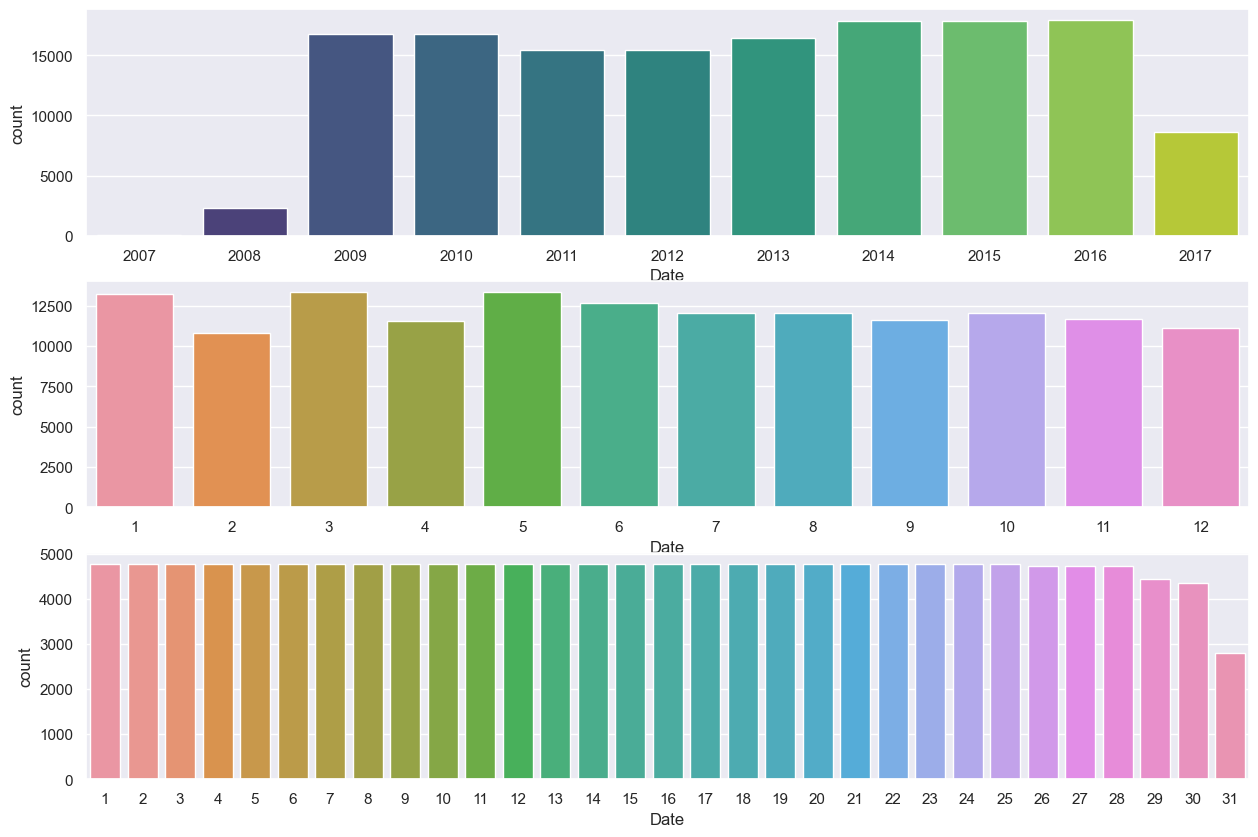

In [48]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
sns.countplot(ax=axes[0], x=pd.to_datetime(df.Date).dt.year, palette="viridis")
sns.countplot(ax=axes[1], x=pd.to_datetime(df.Date).dt.month)
sns.countplot(ax=axes[2], x=pd.to_datetime(df.Date).dt.day)
plt.show()

**Observaciones:**
* La variable Date la podemos descomponer en año, mes y día, es muy probable que solo nos interese estudiar solo la probabilidad de lluvia en cada uno de los meses.
* La distribución de datos de los años es bastante uniforme, salvo por el los dos primeros y el ultimo año que hay menos datos.
* La distribución del datos en los meses y días es uniforme.
* La variable Date nos puede traer un problema de alta cardinalidad, debemos evaluar la influencia del año y el mes para poder determinar si conviene o no incluir de forma separa mes y año.

### Location:

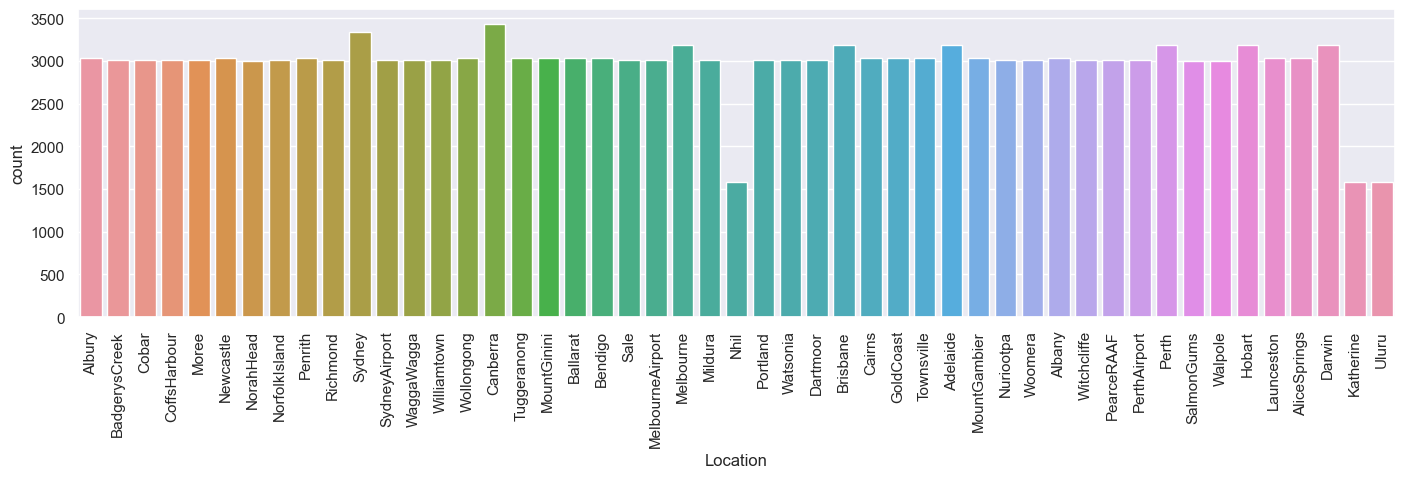

In [49]:
figure(figsize=(17,4))
plt.xticks(rotation=90)
sns.countplot(x=df['Location'])
plt.show()

**Observaciones:**
* La variable Location posee 49 caegórias. Esta variable presenta una cardinalidad alta.
* Se observa que la distribución de los datos es uniforme para todas las locaciones.

### Dirección de viento:

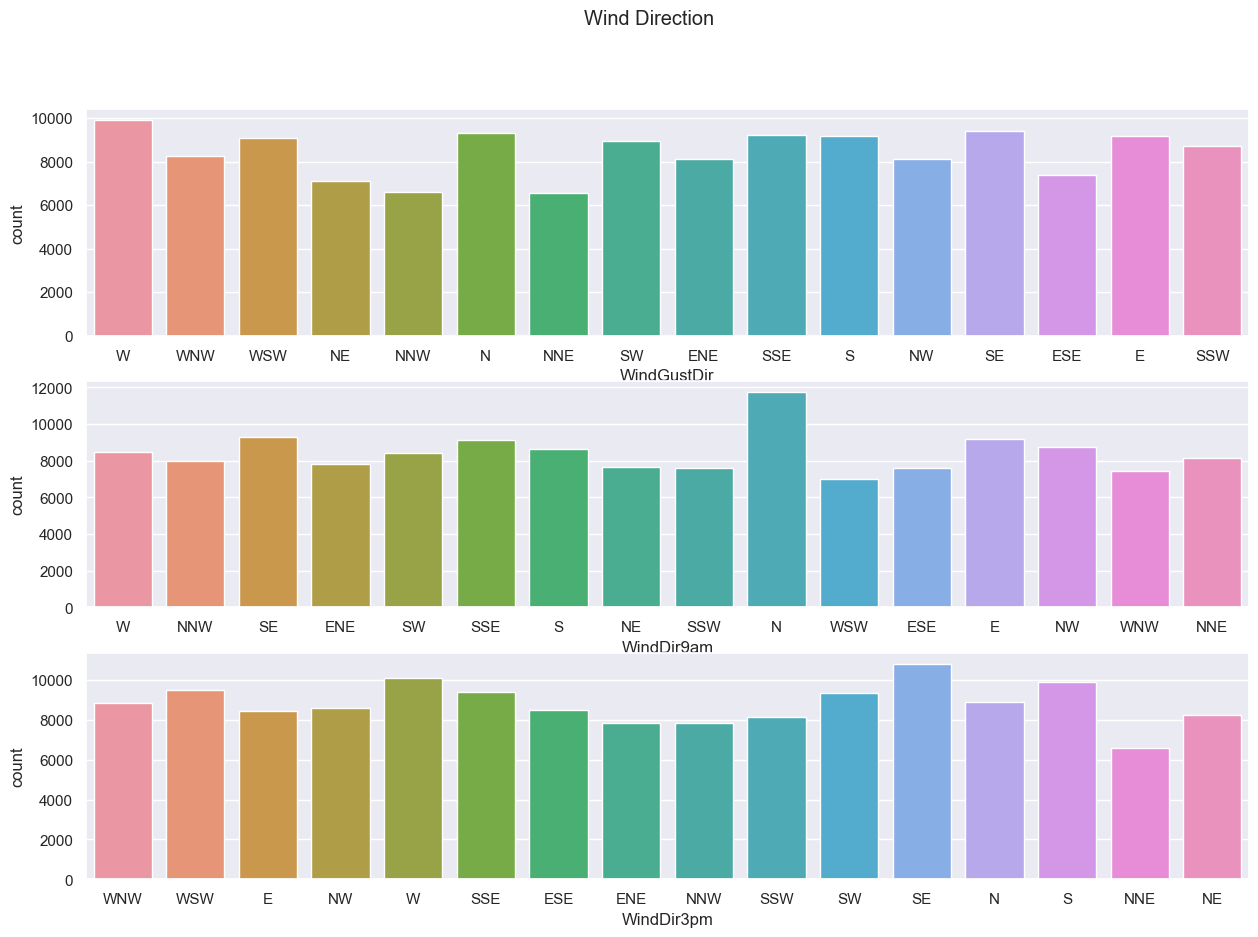

In [50]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
fig.suptitle('Wind Direction')
sns.countplot(ax=axes[0], x=df['WindGustDir'])
sns.countplot(ax=axes[1], x=df['WindDir9am'])
sns.countplot(ax=axes[2], x=df['WindDir3pm'])
plt.show()

**Observaciones:**
* Las variables de dirección del viento poseen 17 categórias que representan diferentes direcciones en el sistema de coordenadas cartesiano, podemos pensar en agrupar estas 17 variables en solo 4 principales (N, S, E, W).
* Se observa que la dirección del viento a las 9:00 am es principalmente desde el norte y a las 3:00 pm del sureste.

### Cloud:
La variable Cloud solo posee 10 categórias correspondientes a la escala Octa utilizada para medir la nubosidad, en la cual 0 representa totalmente despejado y 9 totalmente nublado:

* 0 oktas represents the complete absence of cloud
* 1 okta represents a cloud amount of 1 eighth or less, but not zero
* 7 oktas represents a cloud amount of 7 eighths or more, but not full cloud cover
* 8 oktas represents full cloud cover with no breaks
* 9 oktas represents sky obscured by fog or other meteorological phenomena

https://es.wikipedia.org/wiki/Octa

In [51]:
df['Cloud9am'].value_counts(), df['Cloud3pm'].value_counts()

(7.0    19972
 1.0    15687
 8.0    14697
 0.0     8642
 6.0     8171
 2.0     6500
 3.0     5914
 5.0     5567
 4.0     4420
 9.0        2
 Name: Cloud9am, dtype: int64,
 7.0    18229
 1.0    14976
 8.0    12660
 6.0     8978
 2.0     7226
 3.0     6921
 5.0     6815
 4.0     5322
 0.0     4974
 9.0        1
 Name: Cloud3pm, dtype: int64)

**Observaciones:**
* Existen 10 categórias de nubosidad.
* Existen muy pocos datos para la categória 9 de nubosidad.

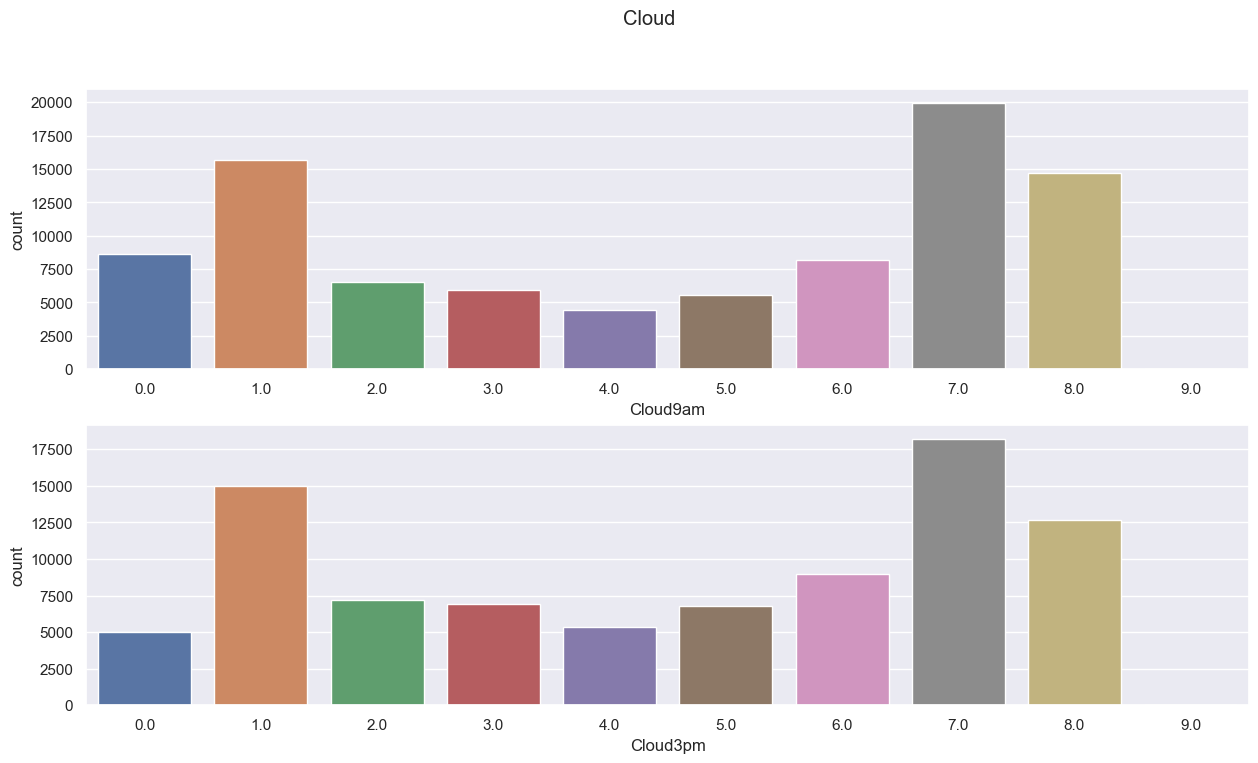

In [52]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
fig.suptitle('Cloud')
sns.countplot(ax=axes[0], x=df['Cloud9am'])
sns.countplot(ax=axes[1], x=df['Cloud3pm'])
plt.show()

### RainToday

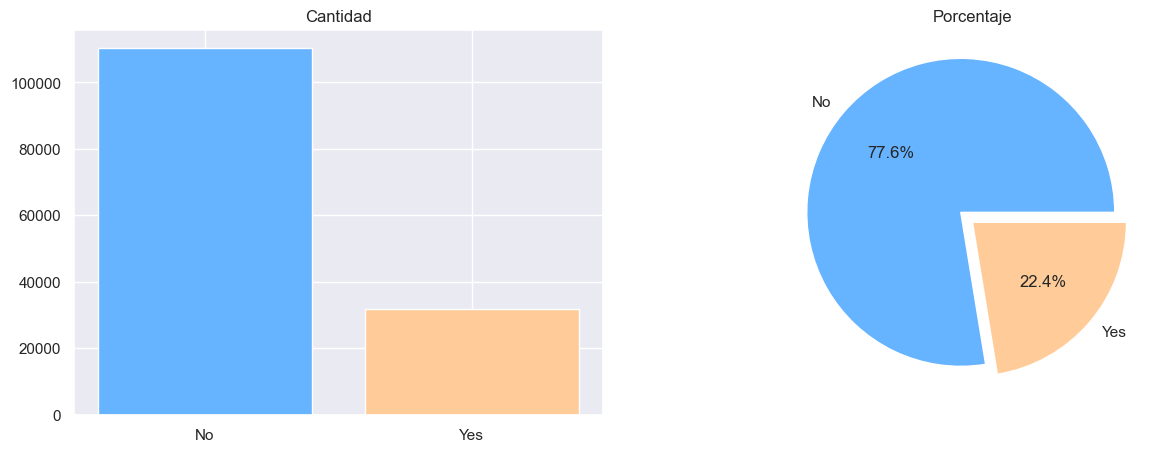

In [53]:
raintoday = df['RainToday'].value_counts()
raintoday_df = raintoday.to_frame().reset_index()
raintoday_df.columns = ["RainToday","porcentaje"]

fig = plt.figure(figsize=(15,5))

ax1=plt.subplot(121)
ax1.bar(raintoday_df["RainToday"], raintoday_df["porcentaje"], color=['#66b3ff','#ffcc99'])
ax1.set_title('Cantidad')

ax1=plt.subplot(122)
ax1.pie(raintoday.values/ len(df) * 100, explode=(0.1, 0),labels=raintoday.index, autopct='%1.1f%%', colors=['#66b3ff','#ffcc99'])
ax1.set_title('Porcentaje')
plt.show()

## Análisis de correlación entre las variables de entrada y la variable de salida:

### Temperaturas vs RainTomorrow:

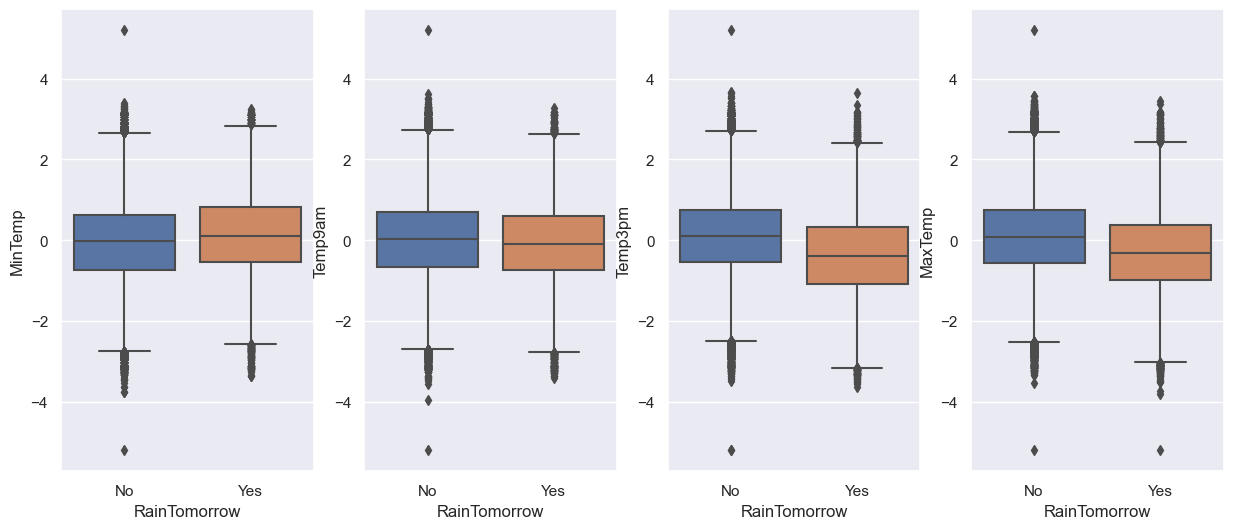

In [54]:
# Transformamos los datos para poder visualizar mejor las relaciones.
qt = QuantileTransformer(n_quantiles=1000, output_distribution='normal', random_state=1)

df_aux = pd.DataFrame.copy(df[["MinTemp", "Temp9am", "Temp3pm", "MaxTemp", "RainTomorrow"]])
df_aux = df_aux[~df_aux.RainTomorrow.isnull()]
data = df_aux[["MinTemp", "Temp9am", "Temp3pm", "MaxTemp"]].values
data = qt.fit_transform(data)
df_aux["MinTemp"] = data[:,0]
df_aux["Temp9am"] = data[:,1]
df_aux["Temp3pm"] = data[:,2]
df_aux["MaxTemp"] = data[:,3]

fig, axes = plt.subplots(1, 4, figsize=(15, 6))
sns.boxplot(x="RainTomorrow", y='MinTemp', data=df_aux, ax=axes[0])
sns.boxplot(x="RainTomorrow", y='Temp9am', data=df_aux, ax=axes[1])
sns.boxplot(x="RainTomorrow", y='Temp3pm', data=df_aux, ax=axes[2])
sns.boxplot(x="RainTomorrow", y='MaxTemp', data=df_aux, ax=axes[3])
plt.show()

**Se observa que a las variables Temp3pm y MaxTemp son las que mayor efecto tienen sobre la variable de salida RainTomorrow**

### Velocidad del viento vs RainTomorrow:     

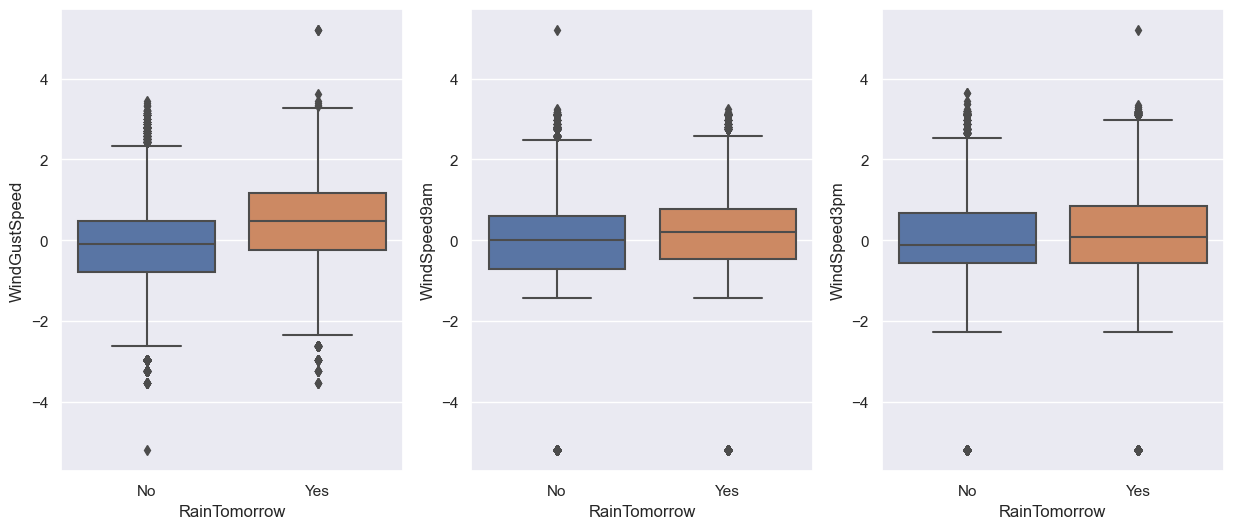

In [57]:
qt = QuantileTransformer(n_quantiles=1000, output_distribution='normal', random_state=1)

df_aux = pd.DataFrame.copy(df[["WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "RainTomorrow"]])
df_aux = df_aux[~df_aux.RainTomorrow.isnull()]
data = df_aux[["WindGustSpeed", "WindSpeed9am", "WindSpeed3pm"]].values
data = qt.fit_transform(data)
df_aux["WindGustSpeed"] = data[:,0]
df_aux["WindSpeed9am"] = data[:,1]
df_aux["WindSpeed3pm"] = data[:,2]

fig, axes = plt.subplots(1, 3, figsize=(15, 6))

sns.boxplot(x="RainTomorrow", y='WindGustSpeed', data=df_aux, ax=axes[0])
sns.boxplot(x="RainTomorrow", y='WindSpeed9am', data=df_aux, ax=axes[1])
sns.boxplot(x="RainTomorrow", y='WindSpeed3pm', data=df_aux, ax=axes[2])

plt.show()

* Se observa que a la variables WindGustSpeed es la que mayor efecto tienen sobre la variable de salida RainTomorrow.
* Se observa muy poca relación entre las variables WindSpeed9am, WindSpeed3pm y la variable de salida RainTomorrow.

### Dirección del viento vs RainTomorrow:

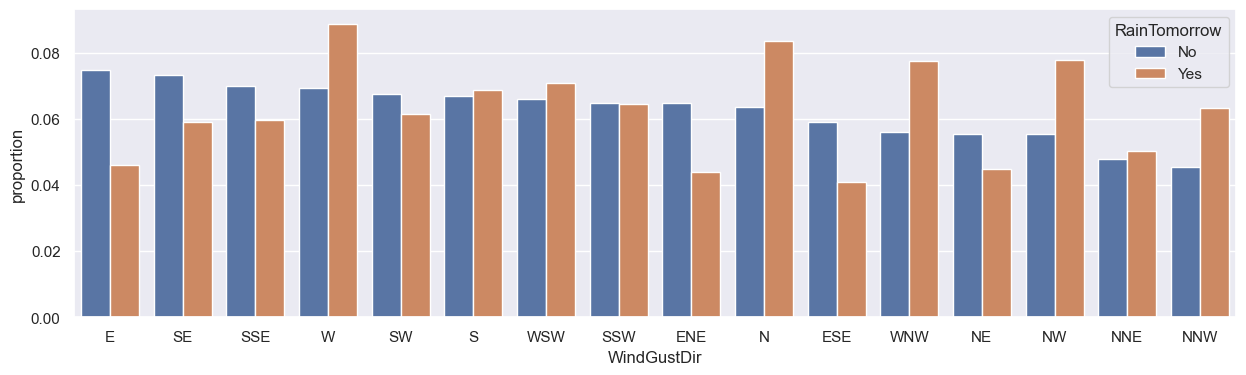

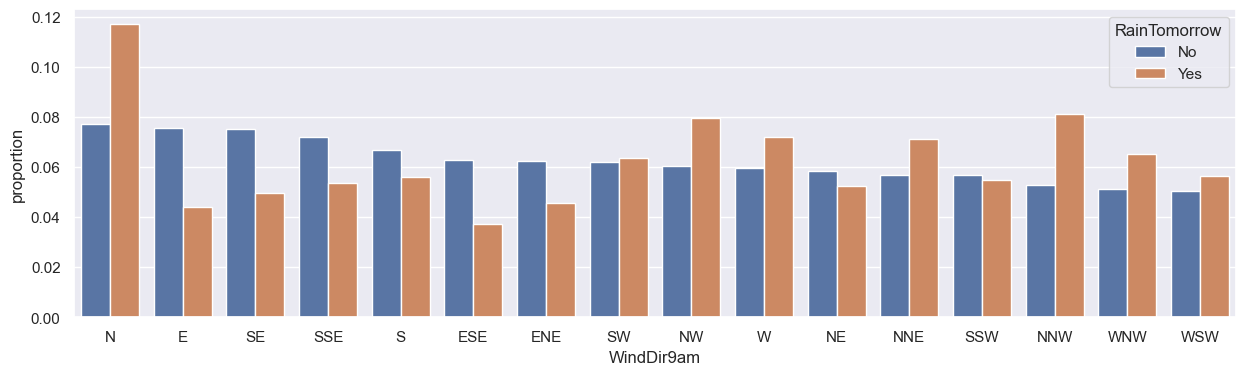

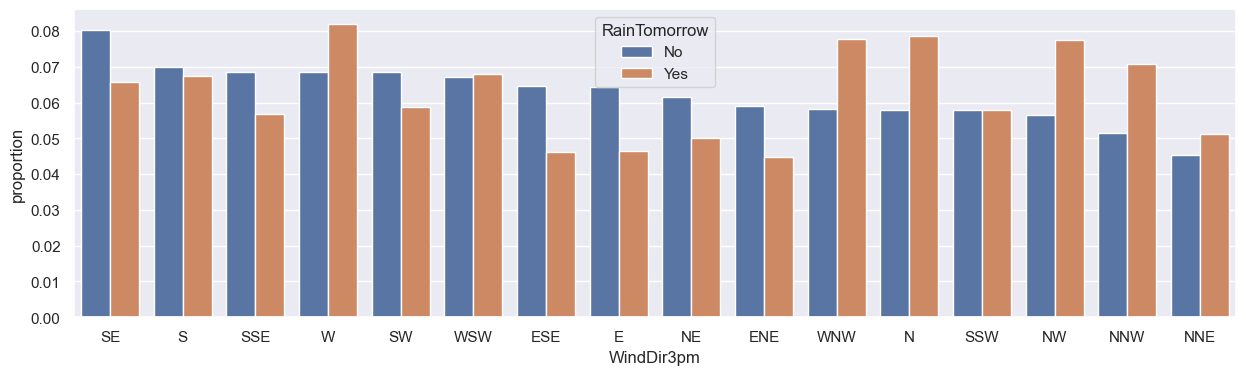

In [58]:
fig, axes = plt.subplots(1, 1, figsize=(15, 4))
x, y, hue = "WindGustDir", "proportion", "RainTomorrow"
df_aux = (df[x].groupby(df[hue]).value_counts(normalize=True).rename(y).reset_index())

ax = sns.barplot(x="WindGustDir", y="proportion", data=df_aux, hue="RainTomorrow")
plt.show()

fig, axes = plt.subplots(1, 1, figsize=(15, 4))
x, y, hue = "WindDir9am", "proportion", "RainTomorrow"
df_aux = (df[x].groupby(df[hue]).value_counts(normalize=True).rename(y).reset_index())

ax = sns.barplot(x="WindDir9am", y="proportion", data=df_aux, hue="RainTomorrow")
plt.show()

fig, axes = plt.subplots(1, 1, figsize=(15, 4))
x, y, hue = "WindDir3pm", "proportion", "RainTomorrow"
df_aux = (df[x].groupby(df[hue]).value_counts(normalize=True).rename(y).reset_index())

ax = sns.barplot(x="WindDir3pm", y="proportion", data=df_aux, hue="RainTomorrow")
plt.show()

**Se observa una fuerte relación entre la dirección del viento y la probabilidad de lluvia. Cuando los vientos provienten entre el norte y el oeste (N, NNW, NW, WNW y W) existe una mayor probabilidad de lluvia.**

### Presión atmosférica y humedad relativa vs Rain Tomorrow:

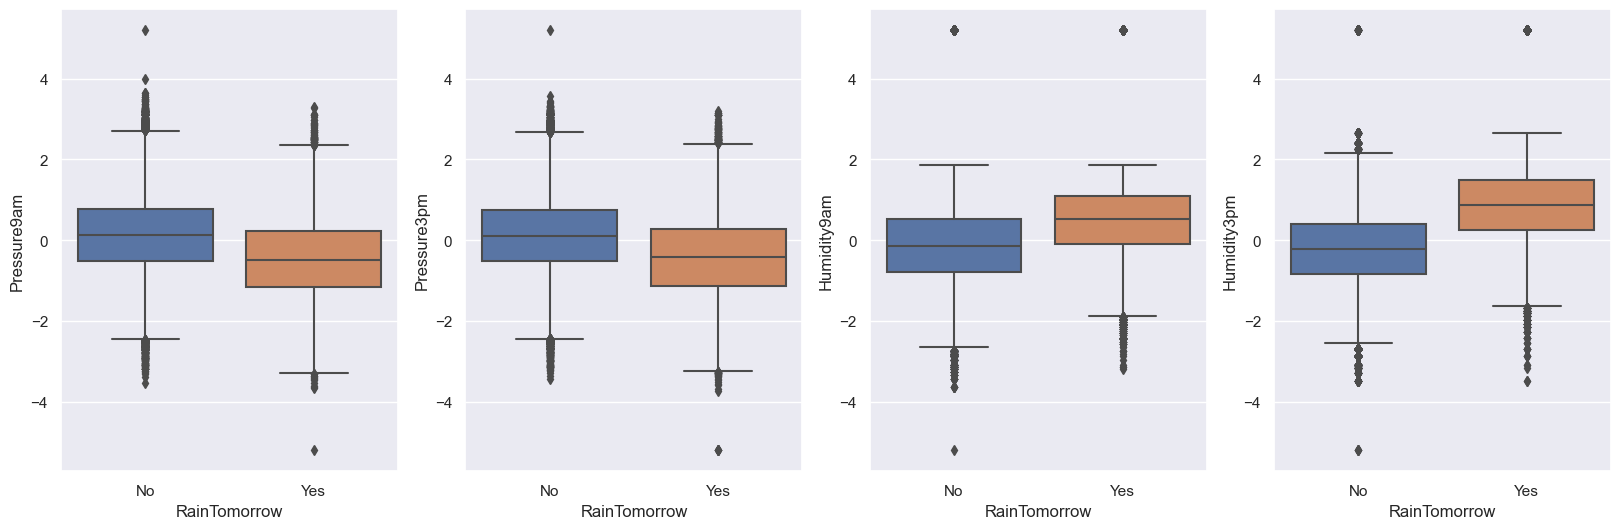

In [59]:
qt = QuantileTransformer(n_quantiles=1000, output_distribution='normal', random_state=1)

df_aux = pd.DataFrame.copy(df[["Pressure9am", "Pressure3pm", "Humidity9am", "Humidity3pm", "RainTomorrow"]])
df_aux = df_aux[~df_aux.RainTomorrow.isnull()]
data = df_aux[["Pressure9am", "Pressure3pm", "Humidity9am", "Humidity3pm"]].values
data = qt.fit_transform(data)
df_aux["Pressure9am"] = data[:,0]
df_aux["Pressure3pm"] = data[:,1]
df_aux["Humidity9am"] = data[:,2]
df_aux["Humidity3pm"] = data[:,3]

fig, axes = plt.subplots(1, 4, figsize=(20, 6))
sns.boxplot(x="RainTomorrow", y='Pressure9am', data=df_aux, ax=axes[0])
sns.boxplot(x="RainTomorrow", y='Pressure3pm', data=df_aux, ax=axes[1])
sns.boxplot(x="RainTomorrow", y='Humidity9am', data=df_aux, ax=axes[2])
sns.boxplot(x="RainTomorrow", y='Humidity3pm', data=df_aux, ax=axes[3])
plt.show()

* Se observa que existe una relación entre las Pressure y la variable salida, menor presión atmoférica
* Se observa una fuerte relación en tre las variables Humidity y la variable de salida.

### RainFall Evaporation y Sunshine vs Rain Tomorrow:

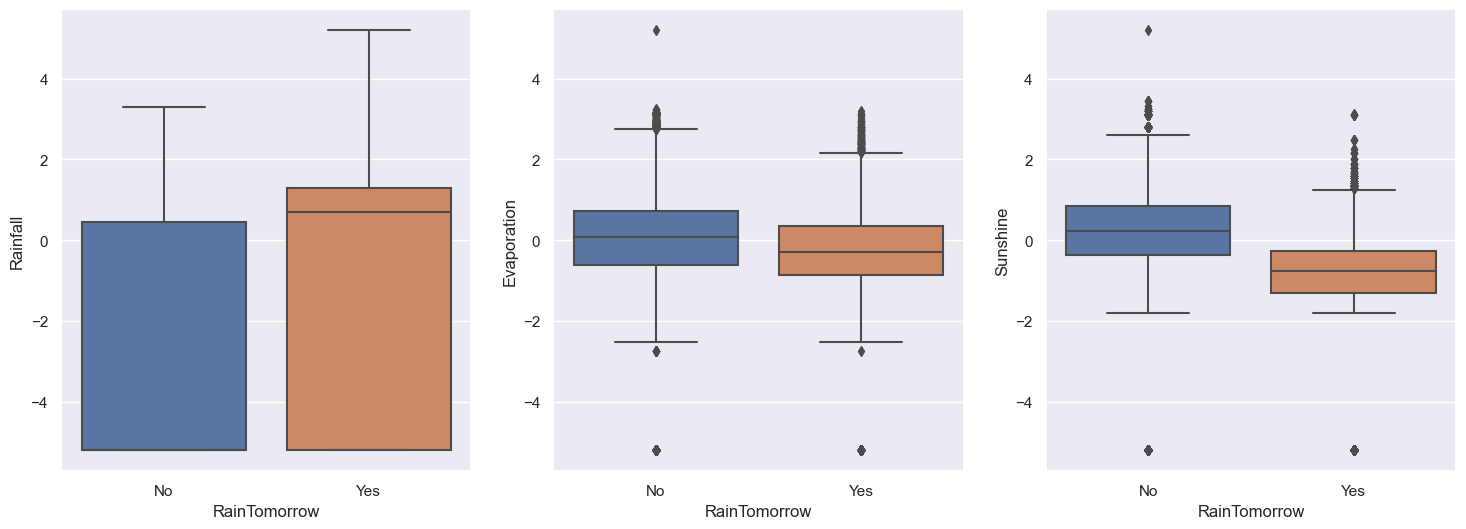

In [60]:
qt = QuantileTransformer(n_quantiles=1000, output_distribution='normal', random_state=1)

df_aux = pd.DataFrame.copy(df[["Rainfall", "Evaporation", "Sunshine", "RainTomorrow"]])
df_aux = df_aux[~df_aux.RainTomorrow.isnull()]
data = df_aux[["Rainfall", "Evaporation", "Sunshine"]].values
data = qt.fit_transform(data)
df_aux["Rainfall"] = data[:,0]
df_aux["Evaporation"] = data[:,1]
df_aux["Sunshine"] = data[:,2]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(x="RainTomorrow", y='Rainfall', data=df_aux, ax=axes[0])
sns.boxplot(x="RainTomorrow", y='Evaporation', data=df_aux, ax=axes[1])
sns.boxplot(x="RainTomorrow", y='Sunshine', data=df_aux, ax=axes[2])
plt.show()

### Date vs Rain Tomorrow:
La idea es analizar los meses más propensos a lluvia.

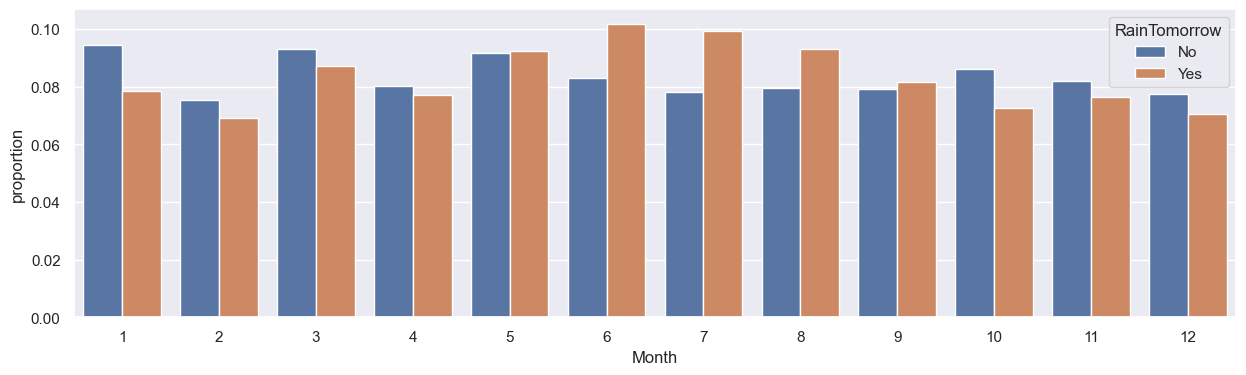

In [61]:
fig, axes = plt.subplots(1, 1, figsize=(15, 4))
df_aux = pd.DataFrame.copy(df[["Date", "RainTomorrow"]])
df_aux = df_aux[~df_aux.RainTomorrow.isnull()]
df_aux["Month"] = pd.to_datetime(df.Date).dt.month

x, y, hue = "Month", "proportion", "RainTomorrow"

df_aux = (df_aux[x].groupby(df_aux[hue]).value_counts(normalize=True).rename(y).reset_index())
ax = sns.barplot(x="Month", y="proportion", data=df_aux, hue="RainTomorrow")
plt.show()


### Rainfall por año y mes.

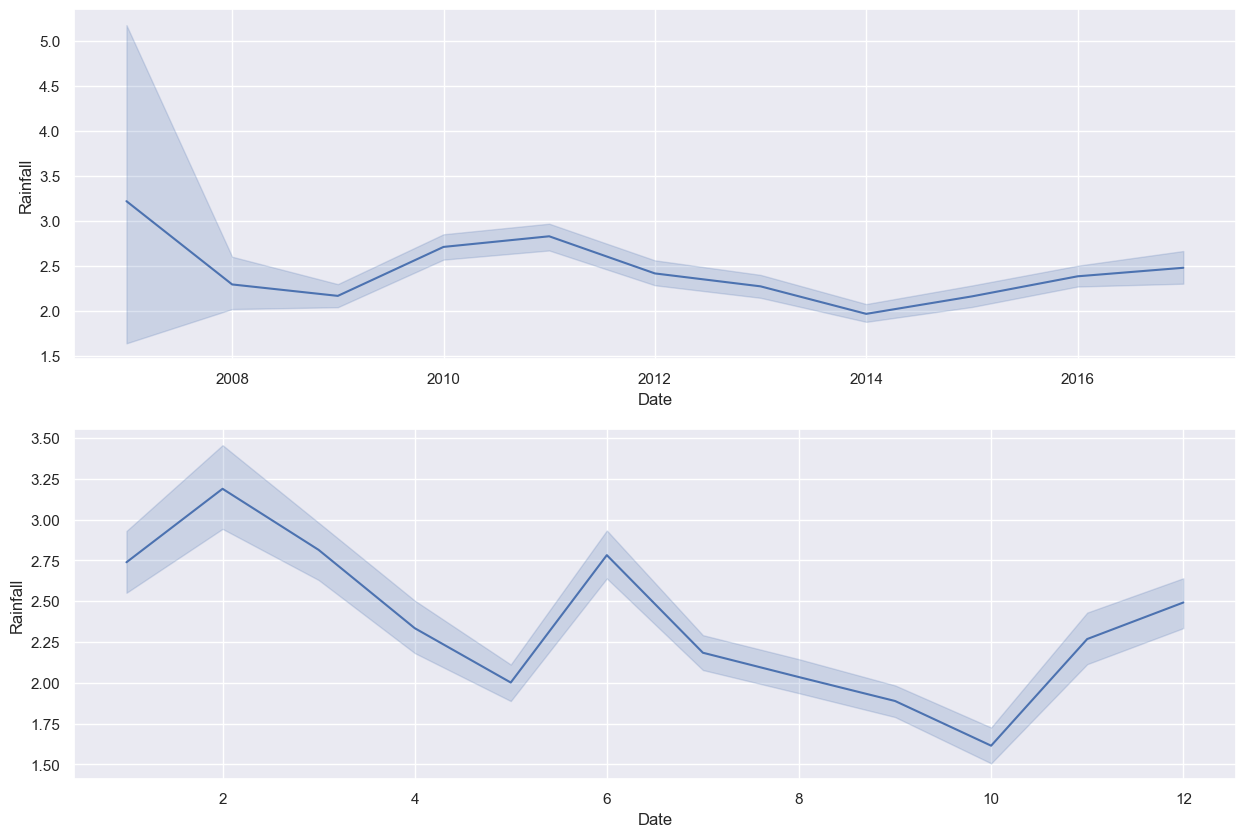

In [62]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
sns.lineplot(ax=axes[0], x=pd.to_datetime(df.Date).dt.year, y=df.Rainfall)
sns.lineplot(ax=axes[1], x=pd.to_datetime(df.Date).dt.month, y=df.Rainfall)
plt.show()

**Observaciones:**
* Se observa que el volumen de lluvía por año es bastante uniforme.
* Se observa que hay un relación significativa entre el mes y el volumen de lluvía promedio. Por ejemplo, el mes de febrero hay mayor cantidad de precipitación promedio.

### Location vs Rain Tomorrow:

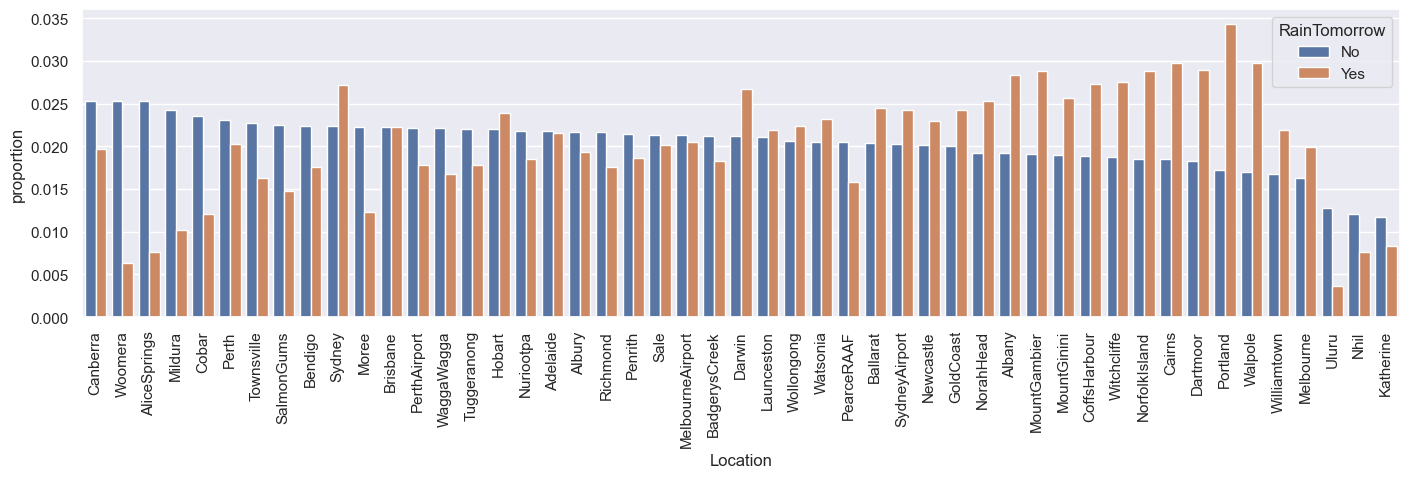

In [64]:
figure(figsize=(17,4))
plt.xticks(rotation=90)
df_aux = pd.DataFrame.copy(df[["Location", "RainTomorrow"]])
df_aux = df_aux[~df_aux.RainTomorrow.isnull()]
df_aux["Location"] = df_aux[["Location"]].values
x, y, hue = "Location", "proportion", "RainTomorrow"

df_aux = (df_aux[x].groupby(df_aux[hue]).value_counts(normalize=True).rename(y).reset_index())
ax = sns.barplot(x="Location", y="proportion", data=df_aux, hue="RainTomorrow")
plt.show()

In [ ]:
# Media del volumen de lluvia por localidades
figure(figsize=(17,4))
plt.xticks(rotation=90)
sns.barplot(x="Location", y="Rainfall", data=df.groupby(["Location"]).mean().reset_index().sort_values(by=["Rainfall"]))
plt.show()



In [ ]:
# Máximo volumen de lluvia por localidades
figure(figsize=(17,4))
plt.xticks(rotation=90)
sns.barplot(x="Location", y="Rainfall", data=pd.DataFrame(df.groupby(['Location'], sort=False)['Rainfall'].max().sort_values()).reset_index())
plt.show()



In [ ]:
df["Month"] = pd.to_datetime(df.Date).dt.month
figure(figsize=(17,4))
df_aux = pd.DataFrame(df[df["Location"] == "Darwin" ].groupby(['Location', "Month"], sort=False)['Rainfall'].mean().sort_values()).reset_index()
sns.barplot(x="Month", y="Rainfall",data=df_aux )
plt.show()

In [ ]:
figure(figsize=(17,4))
df_aux = pd.DataFrame(df[df["Location"] == "Portland" ].groupby(['Location', "Month"], sort=False)['Rainfall'].mean().sort_values()).reset_index()
sns.barplot(x="Month", y="Rainfall",data=df_aux )
plt.show()

**En la localidad de Darwin los meses mas secos son de mayo a septiembre mientras que la localidad de Portland dichos meses corresponden a los meses con mayor cantidad de lluvia. Por lo cual podemos afirmar que existe una fuerte relación entre la localidad y el mes.**

### Nubosidad vs Rain Tomorrow:

In [ ]:
figure(figsize=(17,4))
plt.xticks(rotation=90)

df_aux = pd.DataFrame.copy(df[["Cloud9am", "Cloud3pm", "RainTomorrow"]])
df_aux = df_aux[~df_aux.RainTomorrow.isnull()]
df_aux["Cloud9am"] = df_aux[["Cloud9am"]].values
x, y, hue = "Cloud9am", "proportion", "RainTomorrow"
df_aux = (df_aux[x].groupby(df_aux[hue]).value_counts(normalize=True).rename(y).reset_index())
ax = sns.barplot(x="Cloud9am", y="proportion", data=df_aux, hue="RainTomorrow")
plt.show()

In [ ]:
figure(figsize=(17,4))
plt.xticks(rotation=90)

df_aux = pd.DataFrame.copy(df[["Cloud9am", "Cloud3pm", "RainTomorrow"]])
df_aux = df_aux[~df_aux.RainTomorrow.isnull()]
df_aux["Cloud3pm"] = df_aux[["Cloud3pm"]].values
x, y, hue = "Cloud3pm", "proportion", "RainTomorrow"
df_aux = (df_aux[x].groupby(df_aux[hue]).value_counts(normalize=True).rename(y).reset_index())
ax = sns.barplot(x="Cloud3pm", y="proportion", data=df_aux, hue="RainTomorrow")
plt.show()

* Se observa una relación marcada entre la nubosidad y la probabilidad de lluvía.

### RainToday vs Rain Tomorrow:

In [ ]:
figure(figsize=(17,6))
plt.xticks(rotation=90)

df_aux = pd.DataFrame.copy(df[["RainToday", "RainTomorrow"]])
df_aux = df_aux[~df_aux.RainTomorrow.isnull()]
df_aux["RainToday"] = df_aux[["RainToday"]].values
x, y, hue = "RainToday", "proportion", "RainTomorrow"
df_aux = (df_aux[x].groupby(df_aux[hue]).value_counts(normalize=True).rename(y).reset_index())
ax = sns.barplot(x="RainToday", y="proportion", data=df_aux, hue="RainTomorrow")
plt.show()

* Existe una marcada relación entre las variables RainToday y RainTomorrow. 

## Selección de variables:
### Kolmogorov-Smirnov:

In [ ]:
# Kolmogorov-Smirnov Test para determinar relaciones entre variables númericas.
qt = QuantileTransformer(n_quantiles=1000, output_distribution='normal', random_state=1)
features = ["MinTemp","MaxTemp", "Temp9am", "Temp3pm", "Pressure9am", "Pressure3pm", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm"]
df_aux = pd.DataFrame.copy(df[["MinTemp","MaxTemp", "Temp9am", "Temp3pm", "Pressure9am", "Pressure3pm", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm" ,"RainTomorrow"]])
df_aux = df_aux[~df_aux.RainTomorrow.isnull()]
data = df_aux[features].values
data = qt.fit_transform(data)
test_z = pd.DataFrame({'feature': [], 'statistic_z': [], 'pvalue': []})

for i, col in enumerate (features):
    df_aux[col] = data[:,i]
    x = df_aux[df_aux["RainTomorrow"] == "No"][col]
    y = df_aux[df_aux["RainTomorrow"] == "Yes"][col]
    z = ks_2samp(x, y)
    test_z = test_z.append({'feature': col, 'statistic_z': z[0], 'pvalue': z[1]}, ignore_index=True)
test_z.sort_values(by=["statistic_z"])

**Utilizamos el test de Kolmogorov-Smirnov lograr determinar el grado de "separación" de las distribuciones de las variables dado RainTomorrow="Yes" y la distribución de las variables dado RainTomorrow="No".**

* La Valirable Humidity3pm es la varaible que muestra mayor separación, lo cual se había evidenciado en el grafico Box-plot.

### SelectKBest:

In [ ]:
qt = MinMaxScaler()
features = ["MinTemp","MaxTemp", "Temp9am", "Temp3pm", "Pressure9am", "Pressure3pm", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm"]
df_aux = pd.DataFrame.copy(df[["MinTemp","MaxTemp", "Temp9am", "Temp3pm", "Pressure9am", "Pressure3pm", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm" ,"RainTomorrow"]])
df_aux = df_aux[~df_aux.isnull()]
df_aux = df_aux.fillna(0)
df_aux = df_aux.replace({'No':0, 'Yes':1})
data = df_aux[features].values
data = qt.fit_transform(data)

for i, col in enumerate (features):
    df_aux[col] = data[:,i]

UnivariateFeatureSelection = SelectKBest(chi2, k=5).fit(df_aux[features], df_aux.RainTomorrow)

In [ ]:
diccionario = {key:value for (key, value) in zip(UnivariateFeatureSelection.scores_, df_aux.columns)}
sorted(diccionario.items())

In [ ]:
features = ["Date", "Location", "WindGustDir", "WindDir9am", "WindDir3pm", "Cloud9am", "Cloud3pm", "RainToday"]       

**Las mejores 6 variables númericas son RainToday, Humidity3pm, Sunshine, Rainfall, Humidity9am, WindGustSpeed**

## Análisis de variable categórica de salida:

### RainTomorrow:

In [ ]:
raintomorrow = df['RainTomorrow'].value_counts()
raintomorrow_df = raintomorrow.to_frame().reset_index()
raintomorrow_df.columns = ["RainTomorrow","porcentaje"]

fig = plt.figure(figsize=(15,5))

ax1=plt.subplot(121)
ax1.bar(raintomorrow_df["RainTomorrow"], raintomorrow_df["porcentaje"], color=['#66b3ff','#ffcc99'])
ax1.set_title('Cantidad')

ax1=plt.subplot(122)
ax1.pie(raintomorrow.values/ len(df) * 100, explode=(0.1, 0),labels=raintomorrow.index, autopct='%1.1f%%', colors=['#66b3ff','#ffcc99'])
ax1.set_title('Porcentaje')
raintomorrow_df
plt.show()

**Observaciones:**
* Las clases se encuentran desbalanceadas.

## Outliers:

**Se observa que hay 3267 registros en null en la variable de salida.**

In [119]:
df = df[~df.RainTomorrow.isnull()] #Eliminamos los datos que poseen valores faltantes en la variable de salida.

In [120]:
# Convertimos la variable WindGustDir a una variable categoríca númerica
wind_dir = {'N':1, 'NNE':2, 'NE':3, 'ENE':4, 'E':5, 'ESE':6, 'SE':7, 'SSE':8, 'S':9, 'SSW':10, 'SW':11, 'WSW': 12, 'W':13, 'WNW':14, 'NW':15, 'NNW':16}
df['WindGustDir_new'] = df['WindGustDir'].map(wind_dir)
df['WindDir3pm_new'] = df['WindDir3pm'].map(wind_dir)
df['RainToday_new'] = df['RainToday'].map({'Yes':1, 'No':0})
df['Target'] = df['RainTomorrow'].map({'Yes':1, 'No':0})
df = df.drop(['WindGustDir', 'RainToday', 'WindDir3pm'], axis=1)
df["Month"] = pd.to_datetime(df.Date).dt.month
df = df.rename(columns={"RainToday_new": "RainToday", "WindGustDir_new": "WindGustDir", 'WindDir3pm_new':'WindDir3pm'})

In [111]:
def elimino_outliers (df, features, elimino=False):
    df_outliers = pd.DataFrame({'feature': [], 'outliers_zscore':[]})
    for col in features:
        
        #outliers z-score
        data_mean, data_std = np.mean(df[col]), np.std(df[col])
        cutoff = data_std*3
        lower,upper = data_mean-cutoff, data_mean+cutoff
        if elimino:
            mask = ((df[col]<lower) | (df[col]>upper))
            df = df[~mask]
        outliers_zscore = sum((df[col]<lower) | (df[col]>upper))
    
        df_outliers = df_outliers.append({'feature': col, 
                                         'outliers_zscore': outliers_zscore,
                                         }, ignore_index=True)

    return df_outliers, df
  

In [104]:
features = ["MaxTemp", "Pressure3pm", "WindGustSpeed","WindSpeed3pm", "Humidity9am", "Humidity3pm"]
outliers, df = busco_outliers(df, features)

In [105]:
outliers

feature  outliers_livianos  outliers_pesados  outliers_zscore  \
0        MaxTemp              489.0               0.0            331.0   
1    Pressure3pm              919.0               7.0            426.0   
2  WindGustSpeed             3092.0             153.0           1368.0   
3   WindSpeed3pm             2523.0              82.0            958.0   
4    Humidity9am             1425.0               0.0            472.0   
5    Humidity3pm                0.0               0.0              0.0   

   outliers_forest  
0            130.0  
1            180.0  
2             34.0  
3             32.0  
4              1.0  
5              4.0

In [121]:
features = ["MaxTemp", "Pressure3pm", "WindGustSpeed","WindSpeed3pm", "Humidity9am", "Humidity3pm"]
outliers, df = elimino_outliers(df, features, True)
outliers

feature  outliers_zscore
0        MaxTemp              0.0
1    Pressure3pm              0.0
2  WindGustSpeed              0.0
3   WindSpeed3pm              0.0
4    Humidity9am              0.0
5    Humidity3pm              0.0

# 2. Partición del data set:

In [122]:
y = df.Target
X = df.drop(["Date", "Temp9am", "Temp3pm", "Pressure9am", "WindDir9am", "WindSpeed9am", "Cloud9am", "Target", "RainTomorrow", "Rainfall"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

In [123]:
X_train.shape, y_train.shape

((104391, 15), (104391,))

**Eliminación de variables de entradas:**
* Date se sustituye por Month.
* MinTemp, Temp9am, Temp3pm alta correlación con MaxTemp
* Pressure9am alta correlación con Pressure3pm
* Rainfall alta correlación con RainToday
* Evaporation alta correlación con Cloud3pm
* WindDir9am, WindDir3pm alta correlación con WindGustDir
* WindSpeed9am, WindSpeed3pm alta correlación con WindGustSpeed
* Cloud9am alta correlación con Cloud3pm

# 3. Limpieza y preparación de datos / ingeniería de features

## Análisis de faltantes:

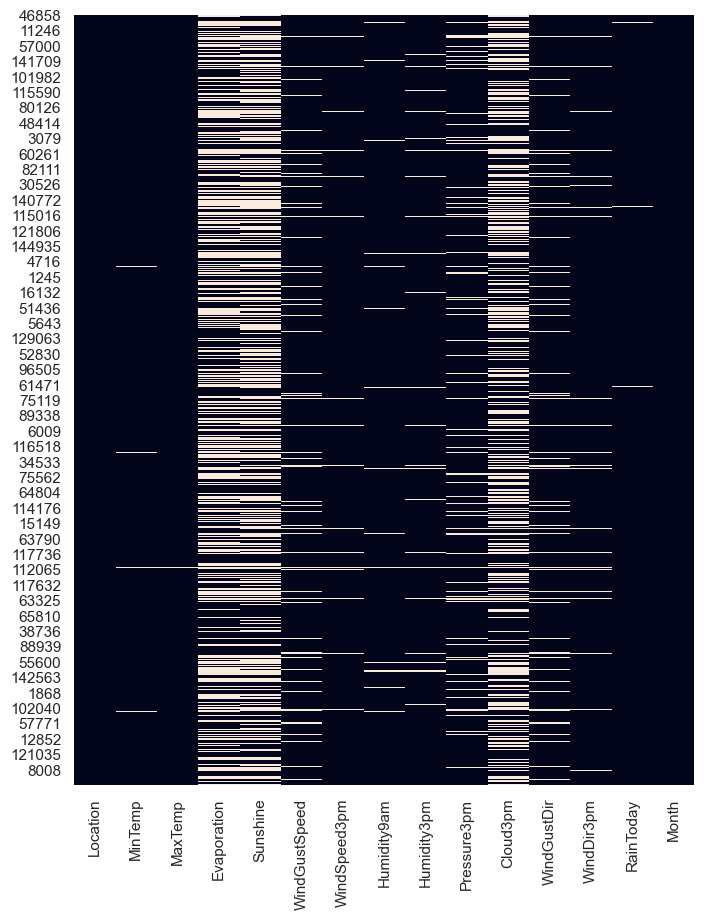

In [124]:
figure(figsize=(8,10))
sns.heatmap(X_train.isnull(), cbar=False)
plt.show()

In [125]:
X_train.isnull().sum()

Location             0
MinTemp            466
MaxTemp            235
Evaporation      44569
Sunshine         49728
WindGustSpeed     6918
WindSpeed3pm      1984
Humidity9am       1259
Humidity3pm       2699
Pressure3pm      10238
Cloud3pm         41822
WindGustDir       6963
WindDir3pm        2847
RainToday         1028
Month                0
dtype: int64

**Observaciones:**
* Se observa un gran número de faltantes en las columnas Evaporation, Sunshine, Cloud9am, Cloud3pm.
* Se observa que los faltantes coinciden en esas columnas, es probable que sean Missing not at Random ya que estos datos no hayan estado disponibles para determinadas localidades.

### Cloud3pm:

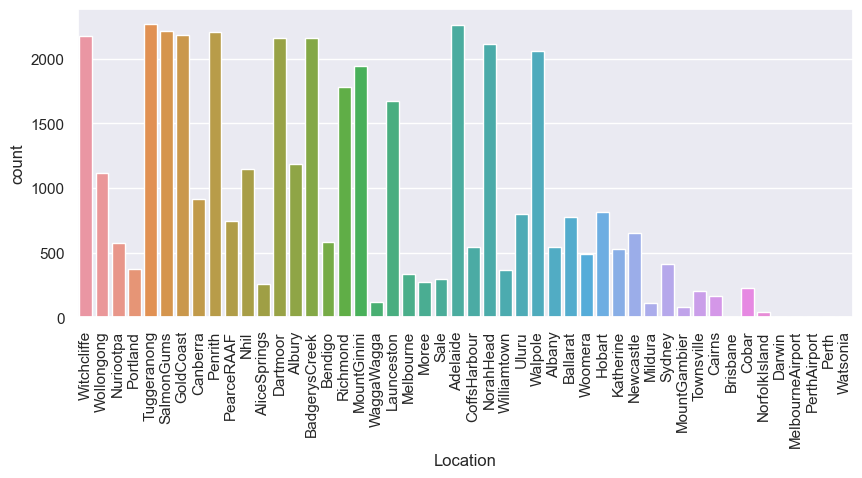

In [128]:
figure(figsize=(10,4))
plt.xticks(rotation=90)
sns.countplot(x=X_train[X_train['Cloud3pm'].isnull()]['Location'])
plt.show()

**Observaciones:**
* Se observa que en algunas localidades no se realizaron mediciones de la variable Cloud3pm.

### Faltantes:

In [ ]:
# Verificamos valores faltantes
faltantes = np.sum(X_train.isnull()/len(X_train)*100).sort_values(ascending=False)
faltantes_df = faltantes.to_frame().reset_index()
faltantes_df.columns = ["columnas","cantidad faltantes"]
figure(figsize=(8,6))
plt.xticks(rotation=90)
ax = sns.barplot(x="columnas", y="cantidad faltantes", data=faltantes_df)
plt.show()

### Observaciones:
* La columna "Cloud" es la características que posee mayor cantidad de faltantes.
* El resto de las columnas posee un número de faltantes por debajo al 10%.
* Las columnas "Dates" y "Location" no poseen nulos.

In [130]:
def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))


def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

In [138]:
categorical_features = ['Location', 'RainToday', 'Cloud3pm']
numeric_features = ['MinTemp','MaxTemp', 'Pressure3pm']
transforn_numeric_features = ['WindGustSpeed', 'WindSpeed3pm', 'Humidity9am','Humidity3pm', 'Sunshine']
ciclical_features_12 = ['Month']
ciclical_features_18 = ['WindGustDir', 'WindDir3pm']



categorical_transformer = Pipeline(steps=[('encoder',CountFrequencyEncoder(encoding_method='frequency'))])  
scale_numeric = Pipeline(steps=[('scaler', StandardScaler())])
transform_numeric =  Pipeline(steps=
     [('Q_transformer', QuantileTransformer(n_quantiles=1000, output_distribution='normal', random_state=1)),])


preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, categorical_features),
        ('numerical_scale',scale_numeric,numeric_features),
        ('numerical_transform', transform_numeric, transforn_numeric_features),
        ("month_sin", sin_transformer(12), ciclical_features_12),
        ("month_cos", cos_transformer(12), ciclical_features_12),
        ("dir_sin", sin_transformer(18), ciclical_features_18),
        ("dir_cos", cos_transformer(18), ciclical_features_18),
    ])

In [174]:
param_grid = {"imputer__strategy": ['most_frequent', 'mean','constant','median' ]}



clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ( 'imputer' ,SimpleImputer()), 
                          ('scaler', StandardScaler()),
                          ('randomf', RandomForestClassifier(n_estimators = 200,max_leaf_nodes = 1000))
                     ])


cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
search = GridSearchCV(estimator=clf,param_grid=param_grid,cv=cv)
results =search.fit(X_train,y_train)


KeyboardInterrupt: 

In [167]:
print('Mejor Puntaje (Accuracy): %.3f ' % results.best_score_)
print('Mejor parámetro: %s ' % results.best_params_)

Mejor Puntaje (Accuracy): 0.842 
Mejor parámetro: {'imputer__strategy': 'median'} 


In [175]:
param_grid = {
     "imputer__strategy": ['most_frequent', 'mean','constant','median' ],

    "lr__max_iter": [1000]
}

results=[]
for param in param_grid["imputer__strategy"]:
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ( 'imputer' ,SimpleImputer()),
                          ('logistic', LogisticRegression())])
    
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
    print (param)
    scores = cross_val_score(clf, X_train, y_train, scoring= 'accuracy' , cv=cv)    
    results.append(scores)

most_frequent
mean


KeyboardInterrupt: 

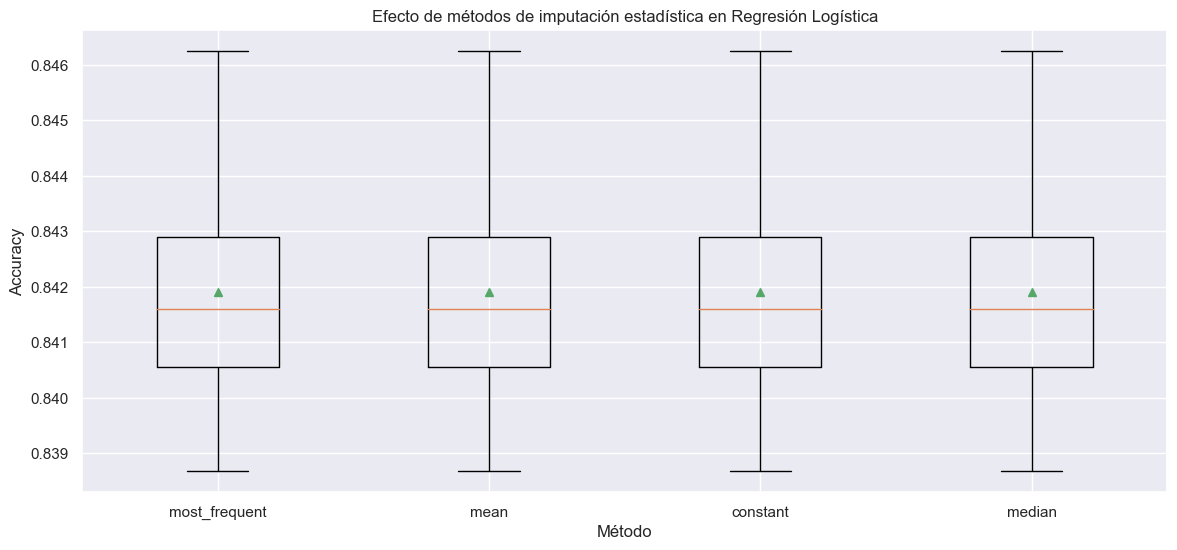

In [172]:
fig,axes = plt.subplots(1,figsize=(14,6))
axes.boxplot(results,labels=param_grid["imputer__strategy"],showmeans=True)
axes.set_xlabel("Método")
axes.set_ylabel("Accuracy")
axes.set_title("Efecto de métodos de imputación estadística en Regresión Logística");
plt.show()

In [171]:
param_idx = np.array([x.mean() for x in results]).argmin()
param_mean_acc = results[param_idx].mean()
print("Mejor accuracy (promedio): ", param_mean_acc)

Mejor accuracy (promedio):  0.8419059212263238


In [ ]:
# MICE
results=[]

param_grid = {
    "imputer__n_nearest_features": [None,1,2,3]
}

for param in param_grid["imputer__n_nearest_features"]:
    print(param)
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ( 'imputer' ,IterativeImputer(n_nearest_features=param)), 
        ( 'lr' , LogisticRegression() )
    ])
    
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
    scores = cross_val_score(pipeline, X, y, scoring= 'accuracy' , cv=cv, n_jobs=-1)    
    results.append(scores)

In [ ]:
fig,axes = plt.subplots(1,figsize=(14,6))
axes.boxplot(results,labels=param_grid["imputer__n_nearest_features"],showmeans=True)
axes.set_xlabel("Método")
axes.set_ylabel("Accuracy")
axes.set_title("Efecto de métodos de imputación estadística en Regresión Logística");
plt.show()

In [ ]:
param_idx = np.array([x.mean() for x in results]).argmin()
param_mean_acc = results[param_idx].mean()
print("Mejor accuracy (promedio): ", param_mean_acc)

In [ ]:
pca = PCA()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ("month_sin", sin_transformer(12), ciclical_features_12),
        ("month_cos", cos_transformer(12), ciclical_features_12),
        ("dir_sin", sin_transformer(18), ciclical_features_18),
        ("dir_cos", cos_transformer(18), ciclical_features_18),
    ])

param_grid = {'logistic__C': np.logspace(-4, 4, 4),'pca__n_components': [1, 3, 5, 6, 9], }

clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ( 'imputer' ,SimpleImputer()),
                          ('sm', SMOTENC(random_state=42, categorical_features=[0, 9, 10])),
                          ('pca', pca),
                          ('logistic', LogisticRegression(max_iter=1000))
                     ])

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
search = GridSearchCV(estimator=clf,param_grid=param_grid,cv=cv)
results =search.fit(X_train,y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)


In [ ]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ( 'imputer' ,SimpleImputer()),
                          ('pca', pca),
                     ])
results = clf.fit_transform(X_train,y_train)
pca = PCA(n_components=6).fit(results)


fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(15, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 15)

plt.tight_layout()

plt.show()

In [ ]:
results = clf.fit_transform(X_train,y_train)
pca = PCA(n_components=2).fit(results).transform(results)


In [ ]:
sns.scatterplot(x=pca[:, 0], y=pca[:, 1], c=y_train)
plt.show()

In [ ]:
results = clf.fit_transform(X_train,y_train)
pca = PCA(n_components=3).fit(results).transform(results)
fig = plt.figure(1, figsize=(13,13))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
p = ax.scatter(pca[:, 0], pca[:, 1], pca[:, 2], c=y_train,
           cmap=plt.cm.magma, edgecolor='k', s=40)
plt.show()

In [ ]:
def print_roc(X_test, y_test, model):
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [163]:
def proceso_model(modelo, imprimo_roc=False):
    categorical_features = ['Location', 'RainToday', 'Cloud3pm']
    numeric_features = ['MinTemp','MaxTemp', 'Pressure3pm']
    transforn_numeric_features = ['WindGustSpeed', 'WindSpeed3pm', 'Humidity9am','Humidity3pm']
    ciclical_features_12 = ['Month']
    ciclical_features_18 = ['WindGustDir', 'WindDir3pm']
    
    categorical_transformer = Pipeline(steps=[('encoder',CountFrequencyEncoder(encoding_method='frequency'))])  
    scale_numeric = Pipeline(steps=[('scaler', StandardScaler())])
    transform_numeric =  Pipeline(steps=
     [('Q_transformer', QuantileTransformer(n_quantiles=1000, output_distribution='normal', random_state=1)),])  


    preprocessor = ColumnTransformer(
    transformers=[
        ('num', transform_numeric, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ("month_sin", sin_transformer(12), ciclical_features_12),
        ("month_cos", cos_transformer(12), ciclical_features_12),
        ("dir_sin", sin_transformer(18), ciclical_features_18),
        ("dir_cos", cos_transformer(18), ciclical_features_18),
    ])
    pca = PCA(n_components=6)

    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ( 'imputer' ,SimpleImputer()), 
                          ('scaler', StandardScaler()),
                          ('sm', SMOTENC(random_state=42, categorical_features=[X_test.dtypes==object],sampling_strategy=.9)),
#                           ('pca', pca),
                          
                          ('model_' , modelo)])

    

    model = clf.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print(classification_report(y_test,y_pred,digits=5))
    if imprimo_roc:
        print_roc (X_test, y_test, model)

In [165]:
modelo =  LogisticRegression(C=1000.0)
proceso_model(modelo,False)

Accuracy = 0.7527947811592953
ROC Area under Curve = 0.7366101505540561
              precision    recall  f1-score   support

           0    0.90266   0.76553   0.82846     27134
           1    0.46016   0.70769   0.55769      7663

    accuracy                        0.75279     34797
   macro avg    0.68141   0.73661   0.69308     34797
weighted avg    0.80521   0.75279   0.76883     34797



In [155]:
modelo = RandomForestClassifier(n_estimators = 200,max_leaf_nodes = 1000)
proceso_model(modelo)

Accuracy = 0.8021955915739862
ROC Area under Curve = 0.7469824796238687
              precision    recall  f1-score   support

           0    0.89489   0.84565   0.86958     27134
           1    0.54260   0.64831   0.59076      7663

    accuracy                        0.80220     34797
   macro avg    0.71874   0.74698   0.73017     34797
weighted avg    0.81731   0.80220   0.80818     34797



In [156]:
modelo = DecisionTreeClassifier(max_depth=16, max_features='auto')
proceso_model(modelo)

Accuracy = 0.7587723079575825
ROC Area under Curve = 0.697460814314612
              precision    recall  f1-score   support

           0    0.87396   0.80703   0.83916     27134
           1    0.46248   0.58789   0.51770      7663

    accuracy                        0.75877     34797
   macro avg    0.66822   0.69746   0.67843     34797
weighted avg    0.78335   0.75877   0.76837     34797



In [ ]:
modelo = SGDClassifier(alpha=0.0001, max_iter=1000, verbose=0)
proceso_model(modelo, False)